# Analysis of marketing activity for Procrastinate Pro+

Table of Contents

1. [Project Overview and Objectives](#project-overview-and-objectives)  
2. [Preparation Phase](#preparation-phase)  
3. [Function Calculations](#function-calculations)  
   3.1. [Get_profiles()](#get_profiles)  
   3.2. [Get_retention()](#get_retention)  
   3.3. [Get_conversion()](#get_conversion)  
   3.4. [Get_ltv()](#get_ltv)  
   3.5. [Visualization Functions](#visualization-functions)  
4. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)  
5. [Marketing](#marketing)  
6. [Ad Campaign Profitability Evaluation](#ad-campaign-profitability-evaluation)  
   6.1. [Conclusions](#conclusions)  



## Project Overview and Objectives


**Goal:**  
Evaluate the effectiveness of advertising channels in terms of return on investment (ROI). Analyze user behavior after acquisition and identify inefficient traffic sources as well as the most profitable countries and devices.

**Description:**  
The project involved analyzing user behavior and financial metrics based on the marketing funnel data. The study included:

- Calculating and visualizing LTV (Lifetime Value), CAC (Customer Acquisition Cost), and ROI (Return on Investment);
- Performing cohort analysis of retention and conversion;
- Comparing metrics across devices, countries, and advertising channels;
- Identifying unprofitable channels;
- Providing recommendations for optimizing the marketing budget.


## Preparation Phase


In [5]:
# Import libraries
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Loading data
visits = pd.read_csv('../data/visits_info_short.csv')
orders = pd.read_csv('../data/orders_info_short.csv')
costs = pd.read_csv('../data/costs_info_short.csv')


In [7]:
# Converting data types
visits['Session Start'] = pd.to_datetime(visits['Session Start'])
visits['Session End'] = pd.to_datetime(visits['Session End'])
orders['Event Dt'] = pd.to_datetime(orders['Event Dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.normalize()

# Checking for missing values
print(visits.isna().sum())
print(orders.isna().sum())
print(costs.isna().sum())

# Checking for duplicates
print(visits.duplicated().sum())
print(orders.duplicated().sum())
print(costs.duplicated().sum())



User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64
User Id     0
Event Dt    0
Revenue     0
dtype: int64
dt         0
Channel    0
costs      0
dtype: int64
0
0
0


In [8]:
print("=== visits_info_short.csv ===")
print(visits.dtypes)
print("\n=== orders_info_short.csv ===")
print(orders.dtypes)
print("\n=== costs_info_short.csv ===")
print(costs.dtypes)


=== visits_info_short.csv ===
User Id                   int64
Region                   object
Device                   object
Channel                  object
Session Start    datetime64[ns]
Session End      datetime64[ns]
dtype: object

=== orders_info_short.csv ===
User Id              int64
Event Dt    datetime64[ns]
Revenue            float64
dtype: object

=== costs_info_short.csv ===
dt         datetime64[ns]
Channel            object
costs             float64
dtype: object


In [9]:
print(visits.info())
print()
display(orders.info())
print()
display(costs.info())
print()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   User Id        309901 non-null  int64         
 1   Region         309901 non-null  object        
 2   Device         309901 non-null  object        
 3   Channel        309901 non-null  object        
 4   Session Start  309901 non-null  datetime64[ns]
 5   Session End    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   User Id   40212 non-null  int64         
 1   Event Dt  40212 non-null  datetime64[ns]
 2   Revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage

None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   Channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


None

In [10]:
print("=== visits ===")
display(visits.head())
print("=== orders ===")
display(orders.head())
print("=== costs ===")
display(costs.head())

=== visits ===


User Id         Region   Device  Channel       Session Start  \
0  981449118918  United States   iPhone  organic 2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic 2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic 2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop 2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic 2019-05-01 03:33:35   

          Session End  
0 2019-05-01 02:45:01  
1 2019-05-01 04:47:35  
2 2019-05-01 15:32:08  
3 2019-05-01 00:54:25  
4 2019-05-01 03:57:40

=== orders ===


User Id            Event Dt  Revenue
0  188246423999 2019-05-01 23:09:52     4.99
1  174361394180 2019-05-01 12:24:04     4.99
2  529610067795 2019-05-01 11:34:04     4.99
3  319939546352 2019-05-01 15:34:40     4.99
4  366000285810 2019-05-01 13:59:51     4.99

=== costs ===


dt   Channel  costs
0 2019-05-01  FaceBoom  113.3
1 2019-05-02  FaceBoom   78.1
2 2019-05-03  FaceBoom   85.8
3 2019-05-04  FaceBoom  136.4
4 2019-05-05  FaceBoom  122.1

**The following steps were performed during the data check:**

A mismatch in date formats was found in the columns `Session Start`, `Session End`, `Event Dt`, and `dt` — all of them were converted to the `datetime64[ns]` type.


## Function Calculations



### Get_profiles()


In [14]:
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):
    # Find parameters of users' first visits
    profiles = (
        sessions.sort_values(by=['User Id', 'Session Start'])
        .groupby('User Id')
        .agg({
            'Session Start': 'first',
            'Channel': 'first',
            'Device': 'first',
            'Region': 'first'
        })
        .rename(columns={'Session Start': 'first_ts'})
        .reset_index()
    )

    # Add cohort date columns
    profiles['dt'] = profiles['first_ts'].dt.normalize()
    profiles['month'] = profiles['first_ts'].values.astype('datetime64[M]')

    # Add flag for paying users
    profiles['payer'] = profiles['User Id'].isin(orders['User Id'].unique())

    # Add flags for specific events, if event_names are provided
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['User Id'].isin(
                events.query('event_name == @event')['User Id'].unique()
            )

    # Count unique users by date and channel
    new_users = (
        profiles.groupby(['dt', 'Channel'])
        .agg({'User Id': 'nunique'})
        .rename(columns={'User Id': 'unique_users'})
        .reset_index()
    )

    # Merge with ad cost data
    ad_costs = ad_costs.merge(new_users, on=['dt', 'Channel'], how='left')

    # Calculate acquisition cost per user
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # Merge acquisition cost back into user profiles
    profiles = profiles.merge(
        ad_costs[['dt', 'Channel', 'acquisition_cost']],
        on=['dt', 'Channel'],
        how='left'
    )

    # Set acquisition cost to 0 for organic users
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles



In [15]:
profiles = get_profiles(visits, orders, events=pd.DataFrame(), ad_costs=costs)
display(profiles.head())

User Id            first_ts     Channel  Device         Region         dt  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States 2019-05-07   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States 2019-07-09   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France 2019-10-01   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany 2019-08-22   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States 2019-10-02   

       month  payer  acquisition_cost  
0 2019-05-01   True          1.088172  
1 2019-07-01  False          1.107237  
2 2019-10-01  False          0.000000  
3 2019-08-01  False          0.988235  
4 2019-10-01  False          0.230769

The `get_profiles` function creates a user profile table that includes:

- the date of the first visit;
- channel, device, and region;
- a flag indicating whether the user made a purchase (`payer`);
- the user acquisition cost (`acquisition_cost`).


### Get_retention()


**Function `get_retention`**

This function calculates user retention by day, starting from the registration date (`profiles`) up to a defined observation horizon.  
Optional grouping parameters can be used (e.g., by country or device).



In [19]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    from datetime import timedelta

    # Add 'payer' column and any additional grouping dimensions
    dimensions = ['payer'] + dimensions

    # Determine the last eligible date for analysis
    last_suitable_date = observation_date
    # Keep only sessions within the specified observation horizon
    if not ignore_horizon:
        last_suitable_date = observation_date - timedelta(days=horizon_days - 1)

    result_raw = profiles.query('dt <= @last_suitable_date')
    # Join session start dates to user profiles
    result_raw = result_raw.merge(
        sessions[['User Id', 'Session Start']],
        on='User Id', how='left'
    )
    # Calculate the number of days between registration and each session
    result_raw['lifetime'] = (
        result_raw['Session Start'] - result_raw['first_ts']
    ).dt.days

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='User Id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'User Id': 'nunique'})
            .rename(columns={'User Id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)

    return result_raw, result_grouped, result_in_time




In [20]:
from datetime import datetime

observation_date = datetime(2020, 1, 1).date()
horizon_days = 7

retention_raw, retention_grouped, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['Device'] 
)




In [21]:
display(retention_raw.head())
display(retention_grouped.head())
display(retention_history.head())


User Id            first_ts   Channel  Device         Region         dt  \
0   599326 2019-05-07 20:58:57  FaceBoom     Mac  United States 2019-05-07   
1   599326 2019-05-07 20:58:57  FaceBoom     Mac  United States 2019-05-07   
2   599326 2019-05-07 20:58:57  FaceBoom     Mac  United States 2019-05-07   
3  4919697 2019-07-09 12:46:07  FaceBoom  iPhone  United States 2019-07-09   
4  4919697 2019-07-09 12:46:07  FaceBoom  iPhone  United States 2019-07-09   

       month  payer  acquisition_cost       Session Start  lifetime  
0 2019-05-01   True          1.088172 2019-05-07 20:58:57         0  
1 2019-05-01   True          1.088172 2019-05-08 06:00:42         0  
2 2019-05-01   True          1.088172 2019-05-09 07:33:16         1  
3 2019-07-01  False          1.107237 2019-07-09 12:46:07         0  
4 2019-07-01  False          1.107237 2019-07-10 22:27:24         1

cohort_size    0         1         2         3         4  \
payer Device                                                              
False Android        32982  1.0  0.176490  0.086805  0.052604  0.033170   
      Mac            28130  1.0  0.176075  0.084749  0.049413  0.033096   
      PC             28918  1.0  0.175323  0.087039  0.051110  0.034650   
      iPhone         51097  1.0  0.178308  0.086463  0.052234  0.035795   
True  Android         2050  1.0  0.404390  0.327805  0.269268  0.224878   

                      5         6  
payer Device                       
False Android  0.024074  0.017343  
      Mac      0.024671  0.018983  
      PC       0.024206  0.017221  
      iPhone   0.024307  0.018768  
True  Android  0.220000  0.178537

cohort_size    0         1         2         3  \
payer Device  dt                                                           
False Android 2019-05-01          195  1.0  0.194872  0.076923  0.051282   
              2019-05-02          171  1.0  0.210526  0.122807  0.046784   
              2019-05-03          193  1.0  0.212435  0.082902  0.062176   
              2019-05-04          217  1.0  0.156682  0.110599  0.073733   
              2019-05-05          229  1.0  0.165939  0.104803  0.052402   

                                 4         5         6  
payer Device  dt                                        
False Android 2019-05-01  0.025641  0.020513  0.010256  
              2019-05-02  0.029240  0.017544  0.023392  
              2019-05-03  0.031088  0.025907  0.010363  
              2019-05-04  0.013825  0.018433  0.009217  
              2019-05-05  0.026201  0.021834  0.026201

### Get_conversion()

In [23]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    from datetime import timedelta

    # Filter data within the observation horizon
    last_suitable_date = observation_date
    if not ignore_horizon:
        last_suitable_date = observation_date - timedelta(days=horizon_days - 1)

    result_raw = profiles.query('dt <= @last_suitable_date').copy()

    # Determine the first purchase date for each user
    first_purchases = (
        purchases.sort_values(by=['User Id', 'Event Dt'])
        .groupby('User Id')
        .agg({'Event Dt': 'first'})
        .reset_index()
    )

    # Merge purchase dates into user profiles
    result_raw = result_raw.merge(
        first_purchases, on='User Id', how='left'
    )

    # Calculate user lifetime
    result_raw['lifetime'] = (
        result_raw['Event Dt'] - result_raw['first_ts']
    ).dt.days

    # If no dimensions provided, create a dummy column
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = ['cohort']

    # Cohort table function
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='User Id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'User Id': 'nunique'})
            .rename(columns={'User Id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # Main grouped table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # Remove 'cohort' from dimensions for the time-based version
    if 'cohort' in dimensions:
        dimensions = []

    # Time-based dynamics
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time


In [24]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['Device']
)



display(conversion_raw.head())
display(conversion_grouped.head())
display(conversion_history.head())

User Id            first_ts     Channel  Device         Region         dt  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States 2019-05-07   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States 2019-07-09   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France 2019-10-01   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany 2019-08-22   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States 2019-10-02   

       month  payer  acquisition_cost            Event Dt  lifetime  
0 2019-05-01   True          1.088172 2019-05-07 20:59:09       0.0  
1 2019-07-01  False          1.107237                 NaT       NaN  
2 2019-10-01  False          0.000000                 NaT       NaN  
3 2019-08-01  False          0.988235                 NaT       NaN  
4 2019-10-01  False          0.230769                 NaT       NaN

cohort_size       0.0       1.0       2.0       3.0       4.0  \
Device                                                                   
Android        35032  0.040734  0.046586  0.049640  0.051439  0.052923   
Mac            30042  0.044604  0.050862  0.053758  0.055689  0.056920   
PC             30455  0.034346  0.039698  0.042062  0.043769  0.045346   
iPhone         54479  0.043723  0.049432  0.052461  0.054737  0.056150   

              5.0       6.0  
Device                       
Android  0.053779  0.054693  
Mac      0.057952  0.058751  
PC       0.046232  0.047086  
iPhone   0.057031  0.057674

cohort_size       0.0       1.0       2.0       3.0  \
Device  dt                                                                
Android 2019-05-01          207  0.038647  0.043478  0.043478  0.043478   
        2019-05-02          177  0.016949  0.022599  0.028249  0.028249   
        2019-05-03          204  0.039216  0.044118  0.053922  0.053922   
        2019-05-04          232  0.047414  0.051724  0.056034  0.056034   
        2019-05-05          235  0.025532  0.025532  0.025532  0.025532   

                         4.0       5.0       6.0  
Device  dt                                        
Android 2019-05-01  0.048309  0.048309  0.048309  
        2019-05-02  0.028249  0.028249  0.028249  
        2019-05-03  0.053922  0.053922  0.053922  
        2019-05-04  0.060345  0.060345  0.064655  
        2019-05-05  0.025532  0.025532  0.025532

### Get_ltv()


In [26]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    from datetime import timedelta

    # Keep only users who are eligible for analysis
    last_suitable_date = observation_date
    if not ignore_horizon:
        last_suitable_date = observation_date - timedelta(days=horizon_days - 1)

    result_raw = profiles.query('dt <= @last_suitable_date').copy()

    # Merge with purchase data
    result_raw = result_raw.merge(
        purchases[['User Id', 'Event Dt', 'Revenue']],
        on='User Id', how='left'
    )

    # Calculate user lifetime
    result_raw['lifetime'] = (
        result_raw['Event Dt'] - result_raw['first_ts']
    ).dt.days

    # If dimensions is empty, create dummy 'cohort' column
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = ['cohort']

    # Function to calculate LTV and ROI
    def group_by_dimensions(df, dims, horizon_days):
        # LTV: cumulative sum of revenue
        result = df.pivot_table(
            index=dims, columns='lifetime', values='Revenue', aggfunc='sum'
        ).fillna(0).cumsum(axis=1)

        # Cohort sizes
        cohort_sizes = (
            df.groupby(dims)
            .agg({'User Id': 'nunique'})
            .rename(columns={'User Id': 'cohort_size'})
        )

        # LTV = revenue / number of users
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes

        # CAC (average acquisition cost)
        cac = (
            df[['User Id', 'acquisition_cost'] + dims]
            .drop_duplicates()
            .groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # ROI = LTV / CAC
        roi = result.div(cac['cac'], axis=0)
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        return result, roi

    # Grouping by specified dimensions
    result_grouped, roi_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # Remove dummy 'cohort' column if it was used
    if 'cohort' in dimensions:
        dimensions = []

    # Time-based dynamics
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time



In [27]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['Device']
)


### Visualization Functions


In [29]:
def filter_data(df, window):
    # Apply moving average smoothing
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df


In [30]:
def plot_retention(retention, retention_history, horizon, window=7):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(15, 10))

    # Drop cohort size and day 0 columns
    retention = retention.drop(columns=['cohort_size', 0])
    retention_history = retention_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # If index has a single level, add 'cohort' as a grouping label
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # 1. Retention curves for paying users
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(grid=True, ax=ax1)
    plt.xlabel('Lifetime')
    plt.title('Retention – Paying Users')

    # 2. Retention curves for non-paying users
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(grid=True, ax=ax2)
    plt.xlabel('Lifetime')
    plt.title('Retention – Non-Paying Users')

    # 3. Retention dynamics over time (paying users)
    ax3 = plt.subplot(2, 2, 3)
    columns = [c for c in retention_history.index.names if c not in ['dt', 'payer']]
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Acquisition Date')
    plt.title(f'{horizon}-Day Retention Dynamics – Paying Users')

    # 4. Retention dynamics over time (non-paying users)
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Acquisition Date')
    plt.title(f'{horizon}-Day Retention Dynamics – Non-Paying Users')

    plt.tight_layout()
    plt.show()


In [31]:
def plot_conversion(conversion, conversion_history, horizon, window=7):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(15, 5))

    conversion = conversion.drop(columns=['cohort_size'])
    conversion_history = conversion_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # Conversion curves by cohort
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.xlabel('Lifetime')
    plt.title('User Conversion by Lifetime')

    # Conversion dynamics over time
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [c for c in conversion_history.index.names if c != 'dt']
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Acquisition Date')
    plt.title(f'{horizon}-Day Conversion Dynamics')

    plt.tight_layout()
    plt.show()


In [32]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(20, 10))

    # Prepare data for plotting
    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    cac_history = roi_history[['cac']]
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[[horizon - 1]]

    # LTV by cohort
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.xlabel('Lifetime')
    plt.title('LTV by Lifetime')

    # LTV dynamics over time
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [c for c in ltv_history.index.names if c != 'dt']
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Acquisition Date')
    plt.title(f'{horizon}-Day LTV Dynamics')

    # CAC dynamics over time
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [c for c in cac_history.index.names if c != 'dt']
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Acquisition Date')
    plt.title('Customer Acquisition Cost (CAC) Dynamics')

    # ROI by cohort
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Break-even threshold')
    plt.xlabel('Lifetime')
    plt.title('ROI by Lifetime')

    # ROI dynamics over time
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [c for c in roi_history.index.names if c != 'dt']
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Break-even threshold')
    plt.xlabel('Acquisition Date')
    plt.title(f'{horizon}-Day ROI Dynamics')

    plt.tight_layout()
    plt.show()


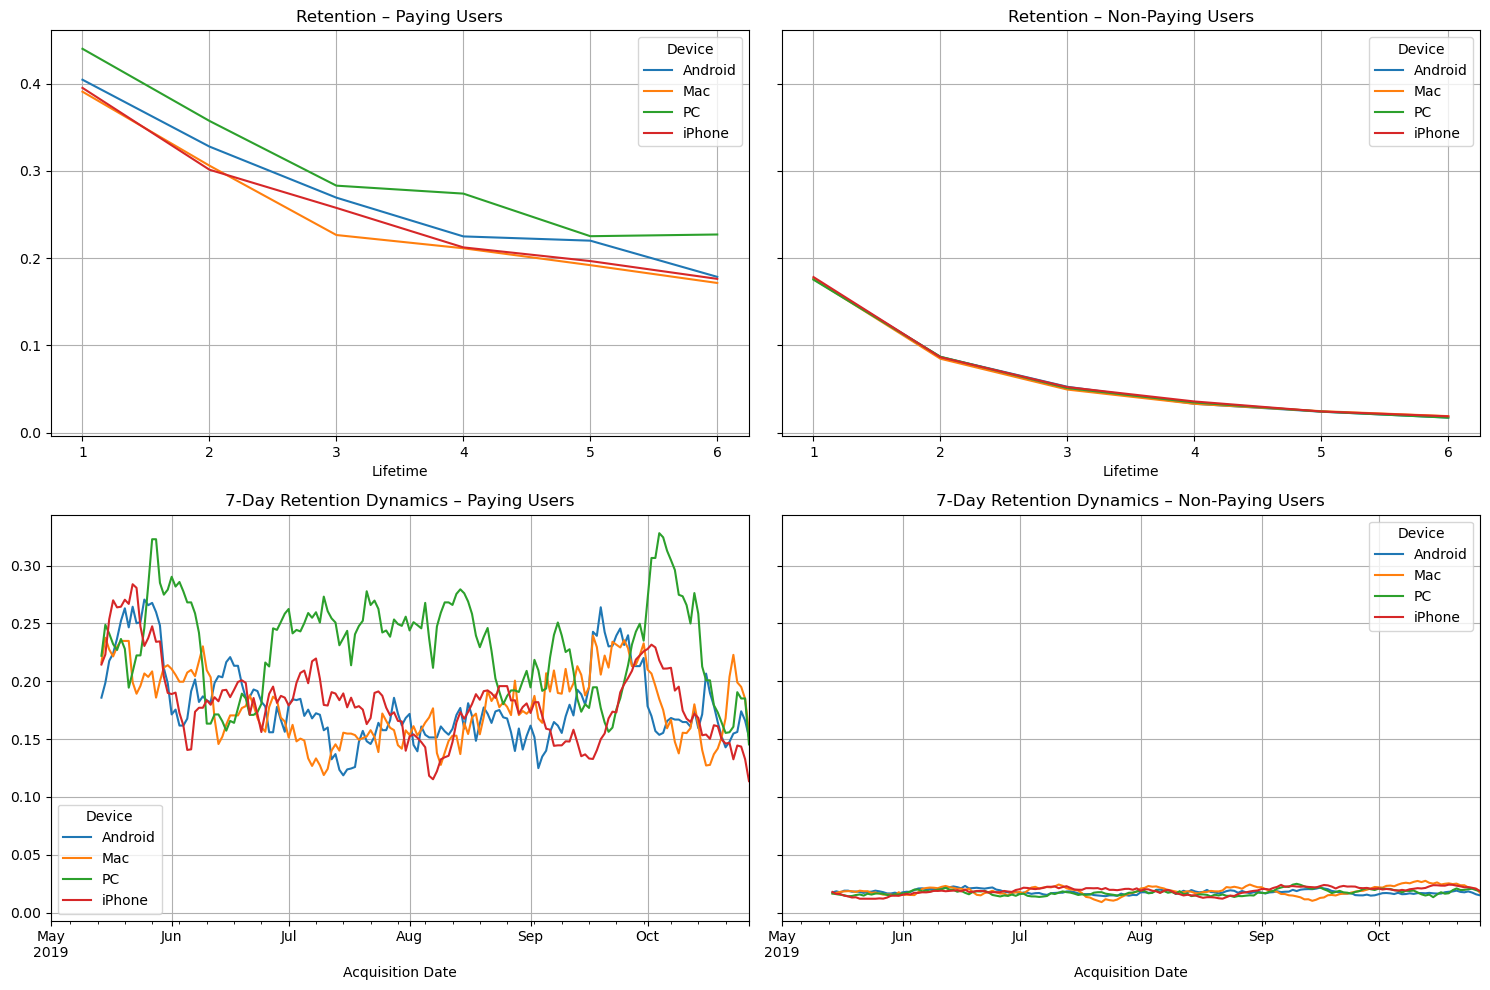

In [33]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['Device']  
)
plot_retention(
    retention_grouped,
    retention_history,
    horizon=horizon_days,
    window=14  
)


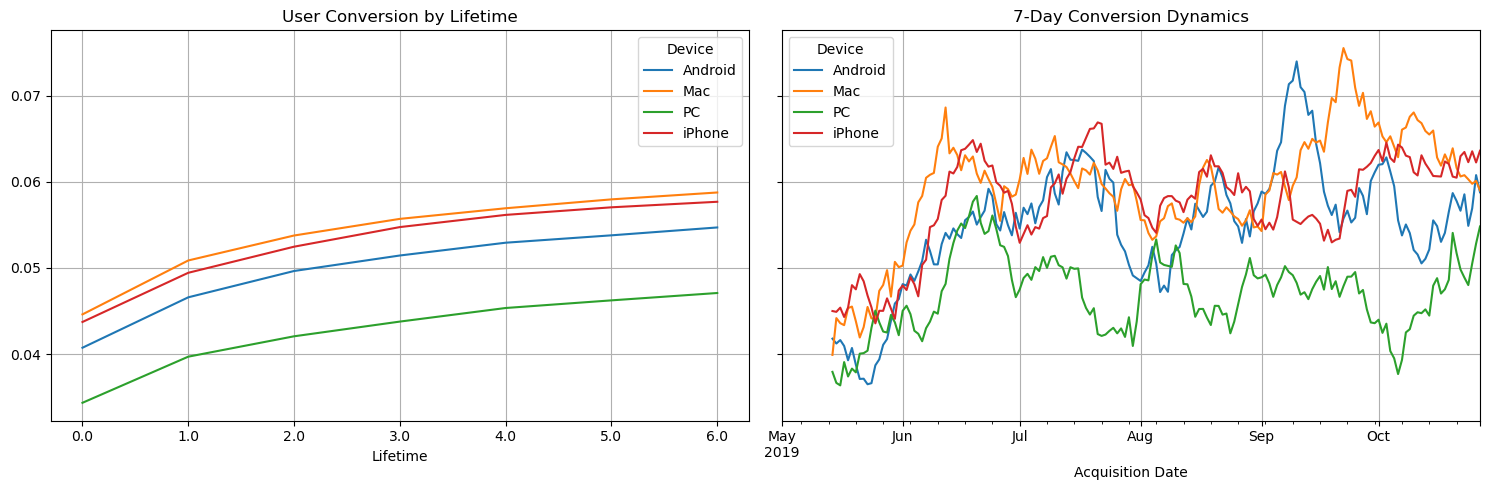

In [34]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['Device']
)

plot_conversion(
    conversion_grouped,
    conversion_history,
    horizon=horizon_days,
    window=14
)


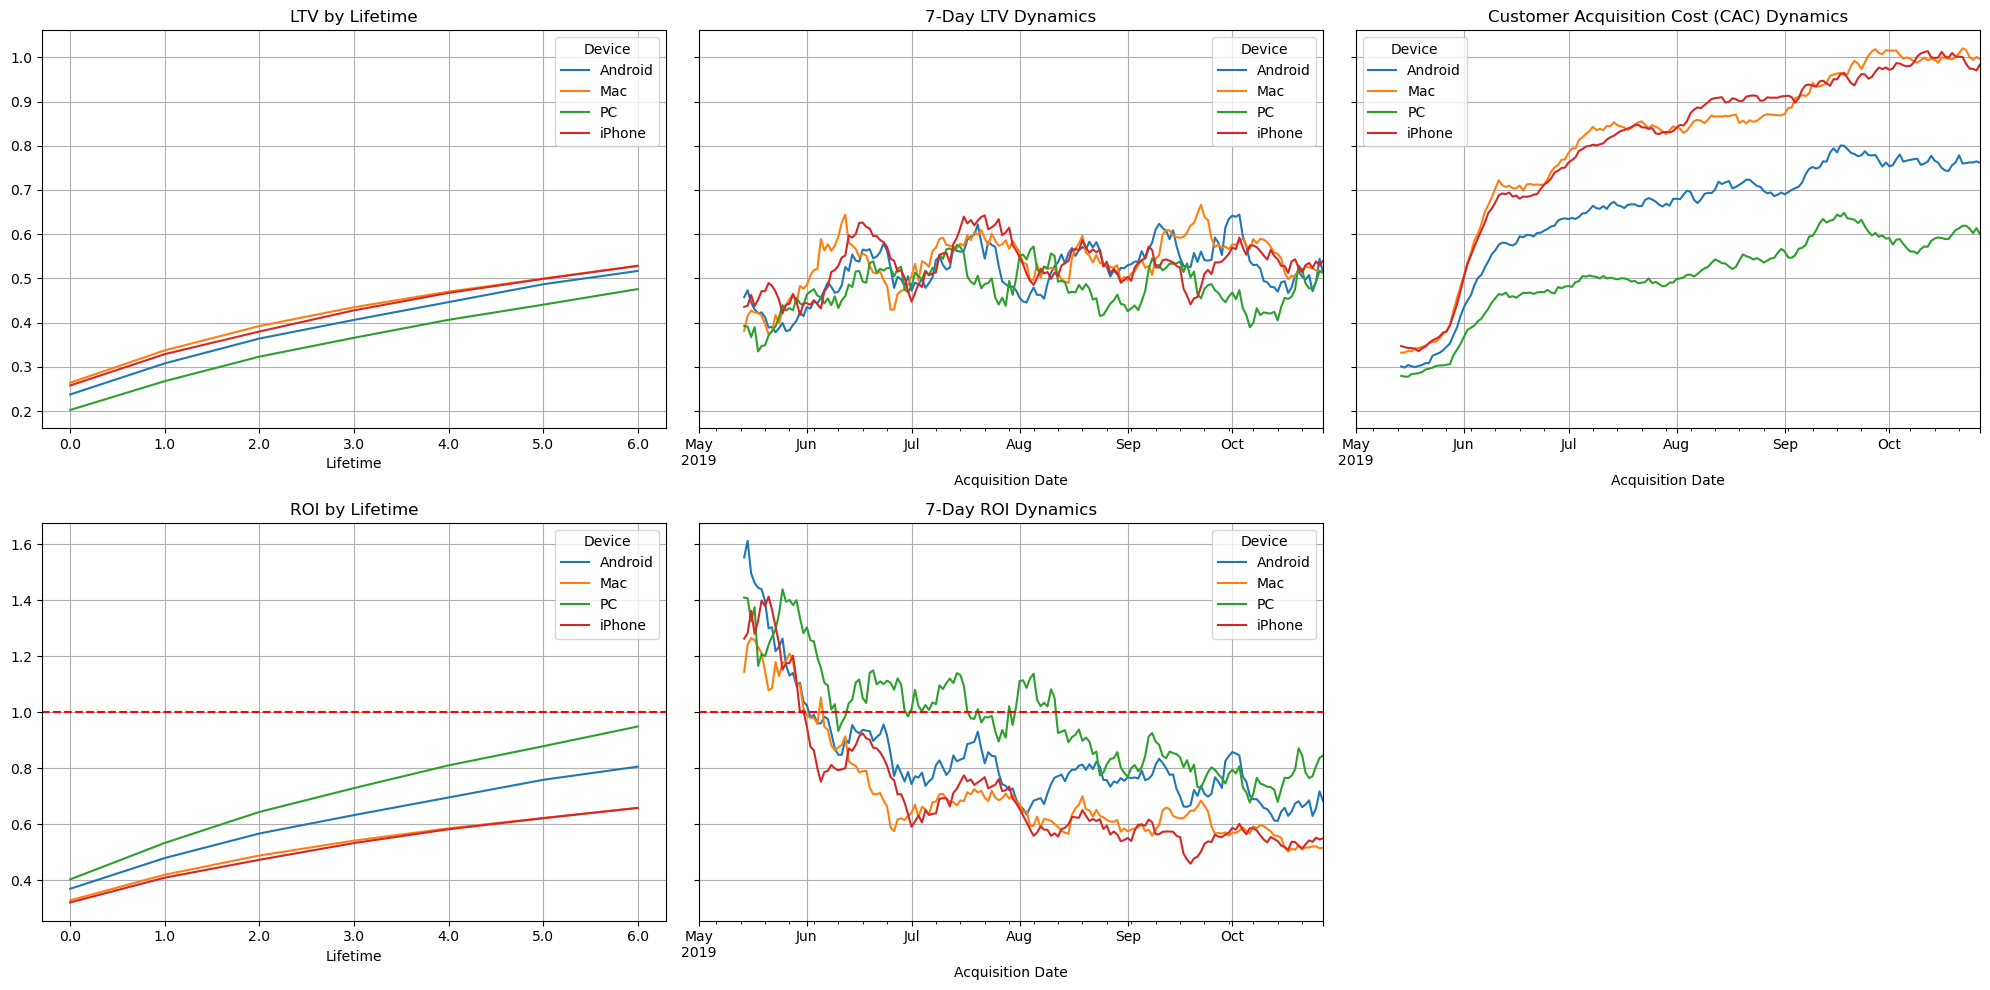

In [35]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['Device']
)

plot_ltv_roi(
    ltv_grouped,
    ltv_history,
    roi_grouped,
    roi_history,
    horizon=horizon_days,
    window=14
)


## Exploratory Data Analysis (EDA)

In [37]:
# Check the earliest and latest acquisition dates

min_date = profiles['dt'].min()
max_date = profiles['dt'].max()

min_date, max_date


(Timestamp('2019-05-01 00:00:00'), Timestamp('2019-10-27 00:00:00'))

- Earliest user acquisition date: May 1, 2019  
- Latest acquisition date: October 27, 2019




In [39]:
# Group users by country
country_stats = (
    profiles
    .groupby('Region')
    .agg({'User Id': 'nunique', 'payer': 'mean'})
    .rename(columns={'User Id': 'users', 'payer': 'share_inside_country'})
    .reset_index()
)

# Convert share of paying users within each country to percentage
country_stats['share_inside_country'] = (country_stats['share_inside_country'] * 100).round(1)

# Calculate the number of paying users per country
payers_by_country = (
    profiles[profiles['payer']]
    .groupby('Region')
    .agg({'User Id': 'nunique'})
    .rename(columns={'User Id': 'payers'})
    .reset_index()
)

# Merge with main table
country_stats = country_stats.merge(payers_by_country, on='Region', how='left')
country_stats['payers'] = country_stats['payers'].fillna(0)

# Calculate each country's share of total payers
total_payers = country_stats['payers'].sum()
country_stats['share_of_all_payers'] = (country_stats['payers'] / total_payers * 100).round(1)

# Sort countries by internal conversion rate
country_stats = country_stats.sort_values('share_inside_country', ascending=False)

# Display results
country_stats[['Region', 'users', 'payers', 'share_inside_country', 'share_of_all_payers']]



Region   users  payers  share_inside_country  share_of_all_payers
3  United States  100002    6902                   6.9                 77.7
1        Germany   14981     616                   4.1                  6.9
2             UK   17575     700                   4.0                  7.9
0         France   17450     663                   3.8                  7.5

**Based on the data, the following conclusion can be drawn:**

The largest segment of both total users and paying users is observed in the United States. The U.S. accounts for 77% of all paying users across all regions and also shows the highest internal share of payers within the country.


In [41]:
# Group users by device type
device_stats = (
    profiles
    .groupby('Device')
    .agg({'User Id': 'nunique', 'payer': 'sum'})
    .rename(columns={'User Id': 'users', 'payer': 'payers'})
    .reset_index()
)

# Calculate share of paying users within each device type
device_stats['share_inside_device'] = (device_stats['payers'] / device_stats['users'] * 100).round(1)

# Calculate each device type's share of total payers
total_payers = device_stats['payers'].sum()
device_stats['share_of_all_payers'] = (device_stats['payers'] / total_payers * 100).round(1)

# Sort by total number of users
device_stats = device_stats.sort_values('users', ascending=False)

device_stats



Device  users  payers  share_inside_device  share_of_all_payers
3   iPhone  54479    3382                  6.2                 38.1
0  Android  35032    2050                  5.9                 23.1
2       PC  30455    1537                  5.0                 17.3
1      Mac  30042    1912                  6.4                 21.5

The highest number of both total users and paying users is observed on iPhone.  
However, Mac users demonstrate the highest internal share of paying users — 6.4%.  
This may indicate that Mac users are more likely to make purchases despite being a smaller segment.  
Alternatively, the product and marketing channels may be better optimized for this device type.


In [43]:
channel_stats = (
    profiles
    .groupby('Channel')
    .agg({'User Id': 'nunique', 'payer': 'sum'})
    .rename(columns={'User Id': 'users', 'payer': 'payers'})
    .reset_index()
)

# Calculate share of paying users within each acquisition channel
channel_stats['share_inside_channel'] = (channel_stats['payers'] / channel_stats['users'] * 100).round(1)

# Calculate each channel's share of total payers
total_payers = channel_stats['payers'].sum()
channel_stats['share_of_all_payers'] = (channel_stats['payers'] / total_payers * 100).round(1)

# Sort channels by total number of users
channel_stats = channel_stats.sort_values('users', ascending=False)

channel_stats


Channel  users  payers  share_inside_channel  \
10             organic  56439    1160                   2.1   
1             FaceBoom  29144    3557                  12.2   
6               TipTop  19561    1878                   9.6   
4   OppleCreativeMedia   8605     233                   2.7   
2              LeapBob   8553     262                   3.1   
7       WahooNetBanner   8553     453                   5.3   
5       RocketSuperAds   4448     352                   7.9   
3         MediaTornado   4364     156                   3.6   
8              YRabbit   4312     165                   3.8   
0           AdNonSense   3880     440                  11.3   
9       lambdaMediaAds   2149     225                  10.5   

    share_of_all_payers  
10                 13.1  
1                  40.1  
6                  21.1  
4                   2.6  
2                   3.0  
7                   5.1  
5                   4.0  
3                   1.8  
8                   1.9  
0                   5.0  
9                   2.5

**Key Insights by Acquisition Channel**

1. **FaceBoom** is the leading channel in terms of paying users:
   - 3,557 paying users (40% of total payers)
   - High conversion rate to payment: 12.2%

2. **TipTop** ranks second by number of paying users:
   - 1,878 paying users (21.1% of total)
   - Solid conversion rate: 9.6%

3. **Organic** is the largest channel by total users (56,439), but has low conversion to payment:
   - Only 2.1% of users convert to paying
   - Still accounts for 13% of all paying users in absolute terms

4. **AdNonSense** and **lambdaMediaAds** are small channels, but show strong conversion performance:
   - AdNonSense: 11.3%
   - lambdaMediaAds: 10.5%


**Evaluation of Acquisition Channels by Country**


In [46]:
# Group by Region and Channel, calculate user count per group
channel_distribution = (
    profiles
    .groupby(['Region', 'Channel'])
    .agg(user_count=('User Id', 'nunique'))
    .reset_index()
)

# Calculate each channel's share within its region
channel_distribution['channel_share'] = (
    channel_distribution
    .groupby('Region')['user_count']
    .transform(lambda x: x / x.sum())
)

# Sort by region and channel share for easier interpretation
channel_distribution = channel_distribution.sort_values(['Region', 'channel_share'], ascending=[True, False])



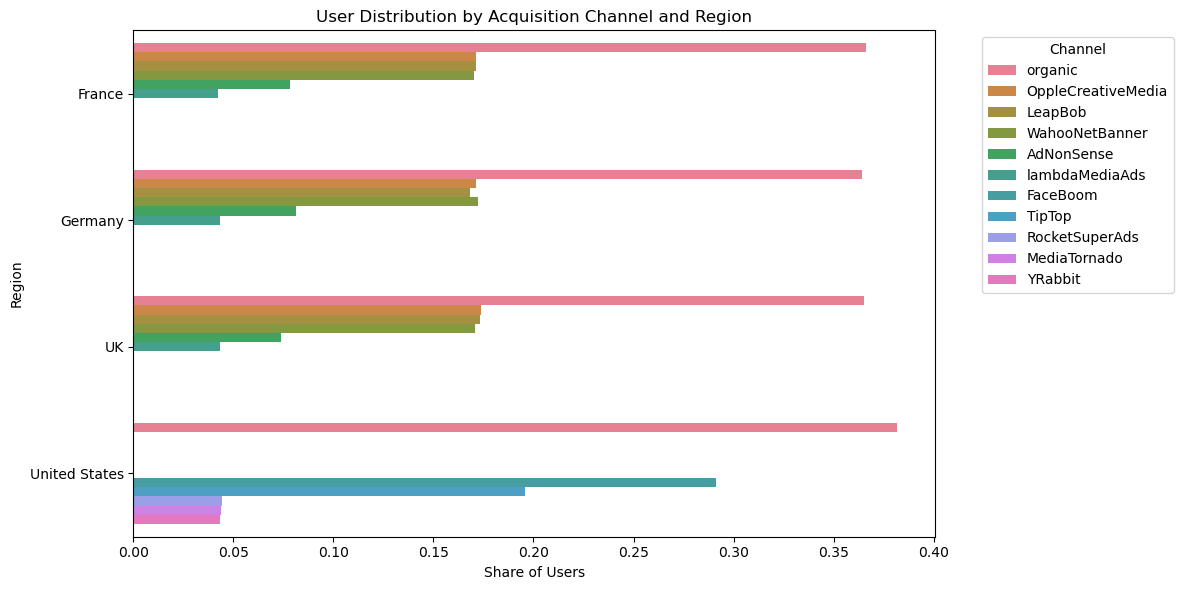

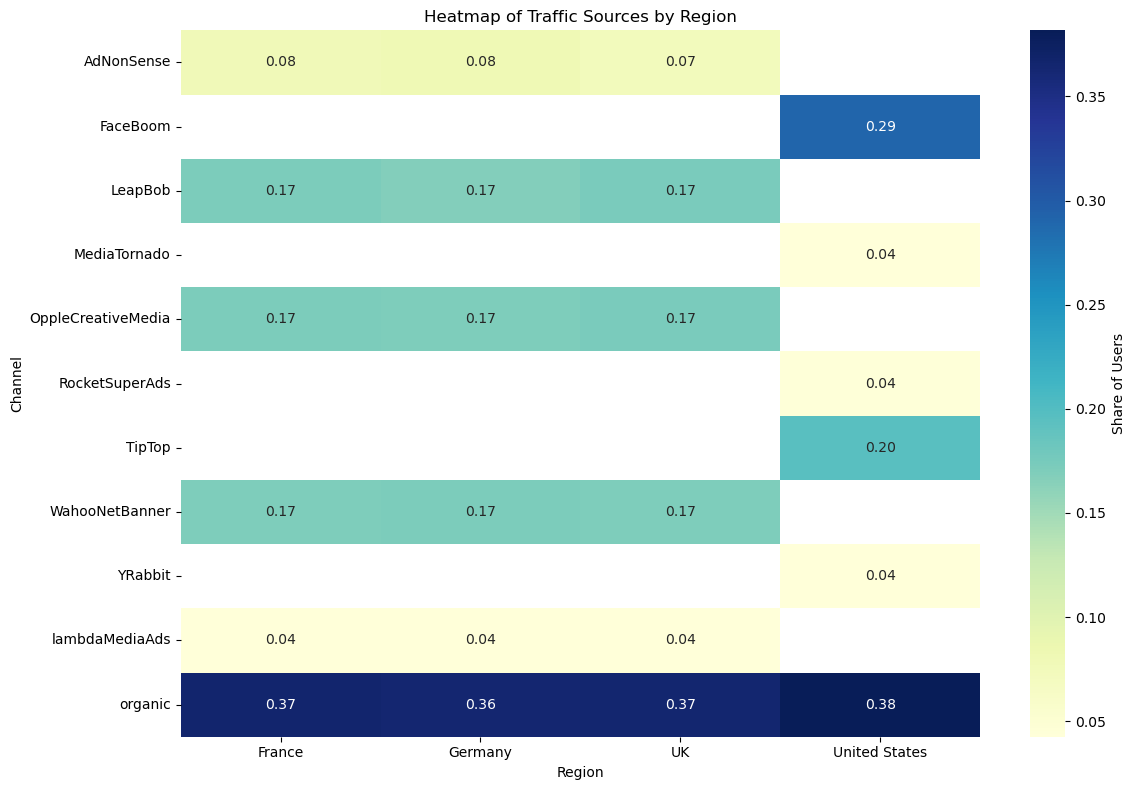

In [47]:
# Barplot: Share of users by channel within each region
plt.figure(figsize=(12, 6))
sns.barplot(
    data=channel_distribution,
    x='channel_share',
    y='Region',
    hue='Channel'
)
plt.title('User Distribution by Acquisition Channel and Region')
plt.xlabel('Share of Users')
plt.ylabel('Region')
plt.legend(title='Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Prepare data for heatmap
heatmap_data = (
    channel_distribution
    .pivot(index='Channel', columns='Region', values='channel_share')
)

# Heatmap: Channel distribution by region
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    cbar_kws={'label': 'Share of Users'}
)
plt.title('Heatmap of Traffic Sources by Region')
plt.xlabel('Region')
plt.ylabel('Channel')
plt.tight_layout()
plt.show()



The United States demonstrates a distinct pattern in user acquisition channels compared to other regions. While organic traffic accounts for nearly 40% across all regions—including the U.S.—the remaining distribution of paid channels significantly differs.

This divergence is clearly visualized in the heatmap and may reflect underlying differences in user behavior, marketing strategies, and cultural market characteristics specific to the U.S. audience.



## Marketing

In [50]:
total_cost = costs['costs'].sum()
print("Total marketing cost:", total_cost)


Total marketing cost: 105497.30000000002


In [51]:
# Aggregate total costs by channel
channel_costs = (
    costs
    .groupby('Channel', as_index=False)
    .agg(total_cost=('costs', 'sum'))
    .sort_values(by='total_cost', ascending=False)
)

# Calculate share of total cost per channel
channel_costs['cost_share'] = (
    channel_costs['total_cost'] / channel_costs['total_cost'].sum() * 100
).round(1)

channel_costs



Channel  total_cost  cost_share
6              TipTop    54751.30        51.9
1            FaceBoom    32445.60        30.8
7      WahooNetBanner     5151.00         4.9
0          AdNonSense     3911.25         3.7
4  OppleCreativeMedia     2151.25         2.0
5      RocketSuperAds     1833.00         1.7
2             LeapBob     1797.60         1.7
9      lambdaMediaAds     1557.60         1.5
3        MediaTornado      954.48         0.9
8             YRabbit      944.22         0.9

**Key Insights:**

- **TipTop** is the top-performing channel in terms of spend: **€54,751** (**52%** of the total budget).
- **FaceBoom** ranks second, accounting for **30%** of total spend.
- **AdNonSense** and **WahooNetBanner** follow, with a noticeably smaller share.
- **YRabbit** and **MediaTornado** are the most cost-efficient channels, representing the lowest spend.


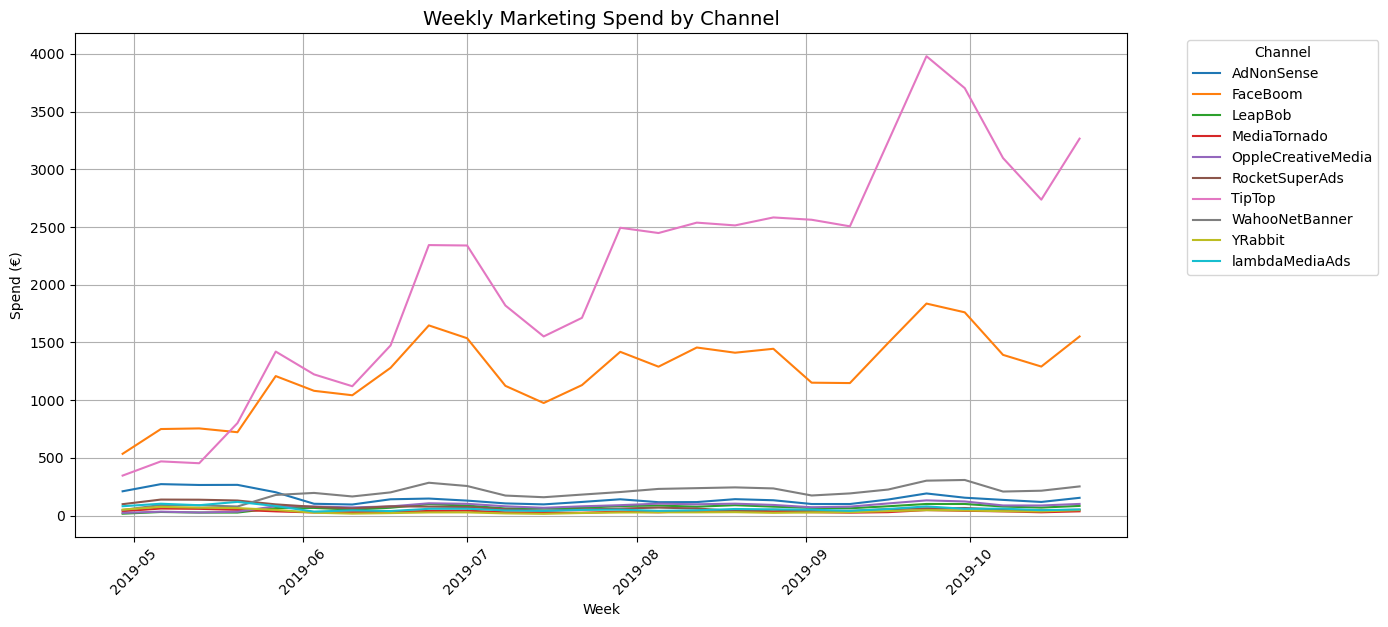

In [53]:
# Add week column (start of the week)
costs['week'] = costs['dt'].dt.to_period('W').apply(lambda r: r.start_time)

# Weekly spend by channel
weekly_costs = (
    costs.groupby(['week', 'Channel'], as_index=False)['costs']
    .sum()
    .rename(columns={'costs': 'weekly_cost'})
)

# Plotting
plt.figure(figsize=(14, 6))
for channel in weekly_costs['Channel'].unique():
    subset = weekly_costs[weekly_costs['Channel'] == channel]
    plt.plot(subset['week'], subset['weekly_cost'], label=channel)

plt.title('Weekly Marketing Spend by Channel', fontsize=14)
plt.xlabel('Week')
plt.ylabel('Spend (€)')
plt.legend(title='Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


- **TipTop** is the most expensive acquisition channel, especially showing spending spikes closer to autumn.
- **FaceBoom** maintains relatively stable weekly expenses, also with visible peaks.
- **Other channels** show significantly lower spend and are barely distinguishable on the shared scale.

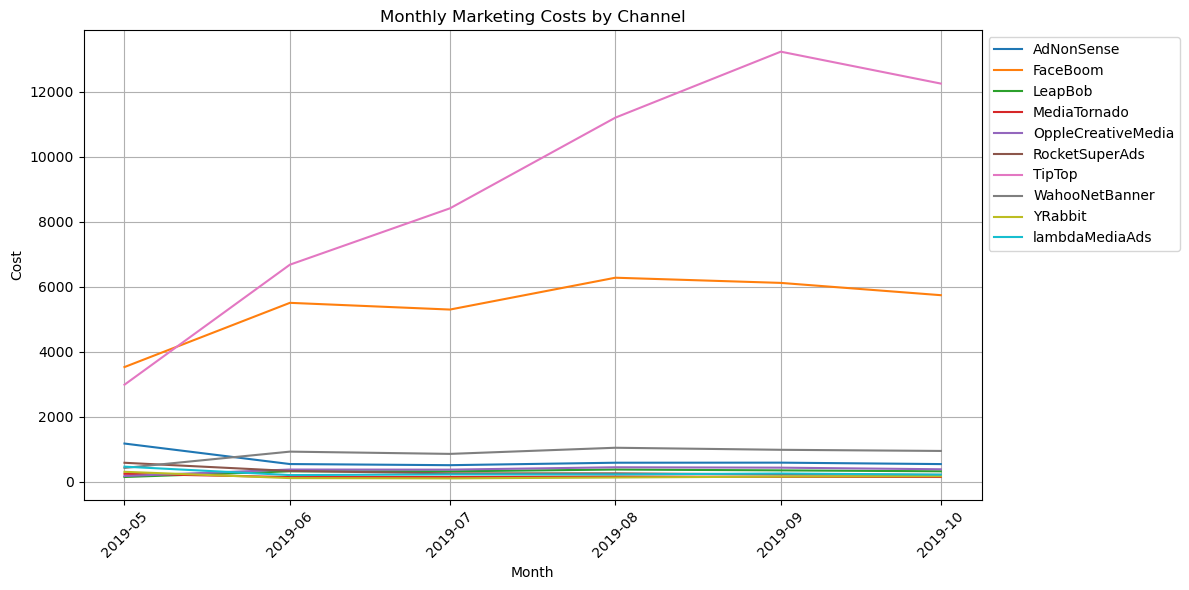

In [55]:
costs['month'] = costs['dt'].dt.to_period('M').dt.to_timestamp()
monthly_costs = costs.groupby(['month', 'Channel'])['costs'].sum().reset_index()

plt.figure(figsize=(12, 6))
for channel in monthly_costs['Channel'].unique():
    data = monthly_costs[monthly_costs['Channel'] == channel]
    plt.plot(data['month'], data['costs'], label=channel)

plt.title('Monthly Marketing Costs by Channel')
plt.xlabel('Month')
plt.ylabel('Cost')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

- **TipTop** — лидер по затратам. С мая по сентябрь наблюдается уверенный рост затрат, потом лёгкий спад.

- **FaceBoom** — второй по объёму расходов, с августа наблюдается плавное снижение.

- **Остальные каналы** тратят значительно меньше, практически на уровне шума по сравнению с лидерами.

- У большинства каналов наблюдается стабильный уровень затрат, без резких скачков.



In [57]:
# Remove duplicate users to avoid counting the same user more than once
unique_users = profiles[['User Id', 'Channel']].drop_duplicates()

# Count the number of unique users per channel
users_per_channel = (
    unique_users
    .groupby('Channel')
    .agg({'User Id': 'count'})
    .rename(columns={'User Id': 'users'})
)

# Calculate total costs per channel
costs_per_channel = (
    costs
    .groupby('Channel')
    .agg({'costs': 'sum'})
    .rename(columns={'costs': 'total_cost'})
)

# Merge cost and user data on Channel
cac_df = costs_per_channel.merge(users_per_channel, on='Channel')

# Calculate CAC (Cost per Acquired Customer)
cac_df['cac'] = (cac_df['total_cost'] / cac_df['users']).round(2)

# Sort by CAC in descending order
cac_df = cac_df.sort_values(by='cac', ascending=False)

# Calculate average CAC across all channels
avg_cac = (cac_df['total_cost'].sum() / cac_df['users'].sum()).round(2)

# Add a flag indicating whether CAC is above average
cac_df['above_avg'] = cac_df['cac'] > avg_cac

# Print results
print(f"Average CAC across all channels: {avg_cac}")
print()
print(cac_df)


Average CAC across all channels: 1.13

                    total_cost  users   cac  above_avg
Channel                                               
TipTop                54751.30  19561  2.80       True
FaceBoom              32445.60  29144  1.11      False
AdNonSense             3911.25   3880  1.01      False
lambdaMediaAds         1557.60   2149  0.72      False
WahooNetBanner         5151.00   8553  0.60      False
RocketSuperAds         1833.00   4448  0.41      False
OppleCreativeMedia     2151.25   8605  0.25      False
MediaTornado            954.48   4364  0.22      False
YRabbit                 944.22   4312  0.22      False
LeapBob                1797.60   8553  0.21      False


 CAC by Channel

 TipTop — CAC = 2.80 (Above Average)

The most expensive acquisition channel. Bringing in one user costs nearly $3. This channel is significantly above the average CAC and might require a reevaluation of efficiency or audience targeting.


 FaceBoom — CAC = 1.11

Ranks second in cost. Despite a relatively high total spend, the channel remains efficient, acquiring nearly 29,000 users at just over $1 per user.


 Lowest CAC Channels — CAC = 0.21–0.22

- LeapBob  
- YRabbit  
- MediaTornado  

These channels offer very low acquisition costs. Further analysis is needed to assess the quality of acquired users — whether they convert to payers and show strong retention.


Channels with Scaling Potential — CAC < 1.00

- WahooNetBanner  
- lambdaMediaAds  
- AdNonSense  

These channels demonstrate good cost-efficiency combined with decent user volume. If behavioral metrics (retention, payment activity) are solid, they are suitable candidates for scaling.


## Ad Campaign Profitability Evaluation


**Overall Ad Campaign Profitability Evaluation**


In [61]:
observation_date = pd.to_datetime('2019-10-27')
horizon_days = 14



In [62]:
# Create a list of paid channels
paid_channels = costs['Channel'].unique()

# Filter only users who came from paid channels
paid_profiles = profiles[profiles['Channel'].isin(paid_channels)]



In [63]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    paid_profiles,
    orders,
    observation_date=observation_date,
    horizon_days=horizon_days
)


In [64]:
### Preview of LTV and ROI Results

display(ltv_grouped.head())
display(roi_grouped.head())

cohort_size       0.0       1.0       2.0       3.0       4.0  \
cohort                                                                     
All users        86138  0.344835  0.435825  0.503889  0.560611  0.611611   

                5.0       6.0       7.0       8.0       9.0      10.0  \
cohort                                                                  
All users  0.654576  0.694741  0.730661  0.765474  0.797583  0.826827   

               11.0      12.0      13.0  
cohort                                   
All users  0.852804  0.878797  0.903117

cohort_size       cac       0.0       1.0       2.0      3.0  \
cohort                                                                    
All users        86138  1.112235  0.310038  0.391846  0.453041  0.50404   

                4.0       5.0       6.0       7.0       8.0       9.0  \
cohort                                                                  
All users  0.549894  0.588523  0.624634  0.656931  0.688231  0.717099   

               10.0      11.0      12.0      13.0  
cohort                                             
All users  0.743392  0.766748  0.790117  0.811984

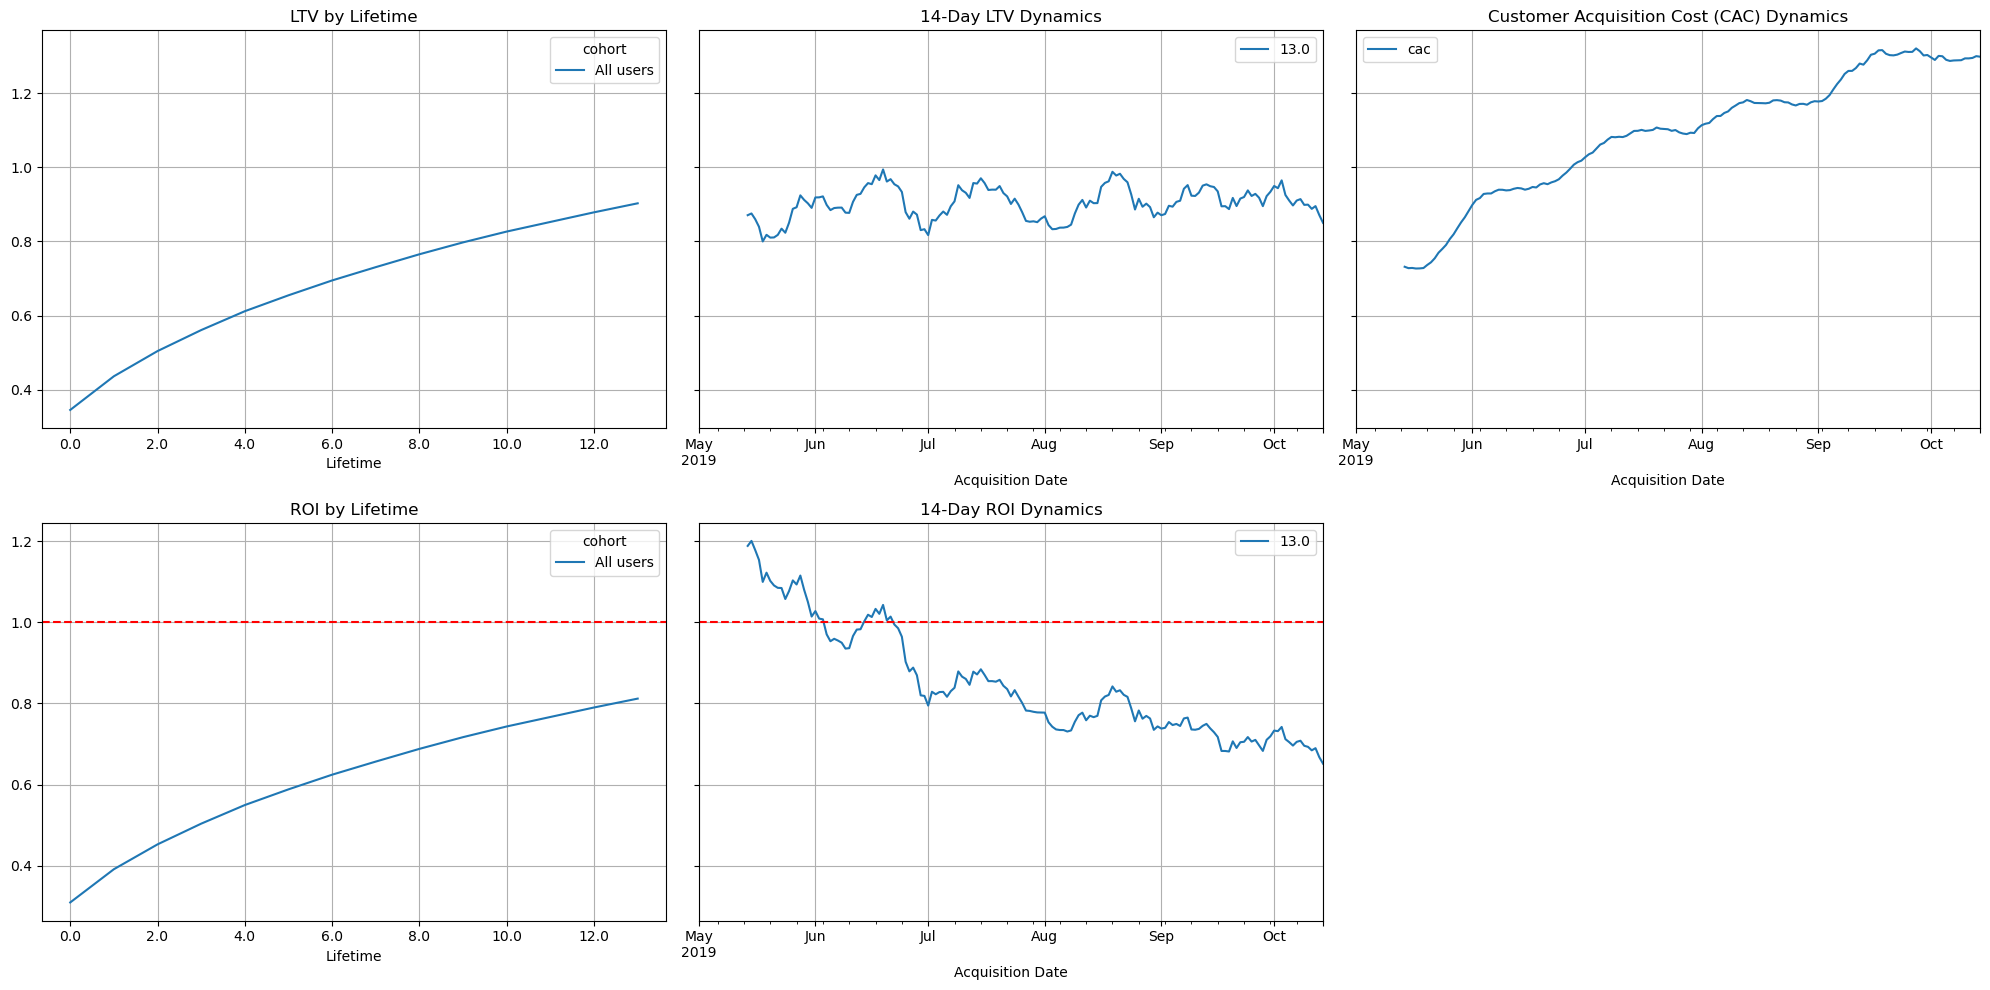

In [65]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    paid_profiles,
    orders,
    observation_date=observation_date,
    horizon_days=horizon_days
)



plot_ltv_roi(
    ltv_grouped,
    ltv_history,
    roi_grouped,
    roi_history,
    horizon=horizon_days,
    window=14 
)


1. LTV of the cohort

The LTV curve shows stable growth over the first 14 days.

LTV by day 14 = 0.90 (i.e., on average, a user generates $0.90 over 14 days).

**Conclusion:**

User monetization is happening, but the LTV growth rate is moderate.

2. LTV dynamics on day 14

After June, instability is observed: LTV fluctuates between 0.8–1.0.  
The indicator is especially volatile during the June–August period.  
From September, cohort values become more stable.

3. CAC by date

Starting in May, CAC shows uninterrupted growth.  
From May to October, CAC nearly doubles.

**Conclusion:**  
The cost of acquiring paid users is growing rapidly.  
This may be caused by overheated ad auctions, inefficient buying, or lack of campaign control.  
At the same time, revenue per user is not growing proportionally.

4. ROI of the cohort

ROI on day 14 reaches only 0.81 — below the breakeven point.

Growth is slow and steady, but by day 14 there’s no payback.

**Conclusion:**  
The company does not recoup costs within the first 14 days of user life.  
This is critical for businesses with short customer life cycles or limited marketing budgets.

5. ROI dynamics on day 14

In May, ROI > 1 — ads were profitable.

Since July, there has been a sharp decline in ROI below 1 — paid traffic became unprofitable.

**Conclusion:**  
Since early summer, advertising efficiency has dropped significantly.  
Most likely, traffic sources, creatives, or buying strategies have changed.  
Falling ROI is a key problem.




**ROI Evaluation by Device Type**


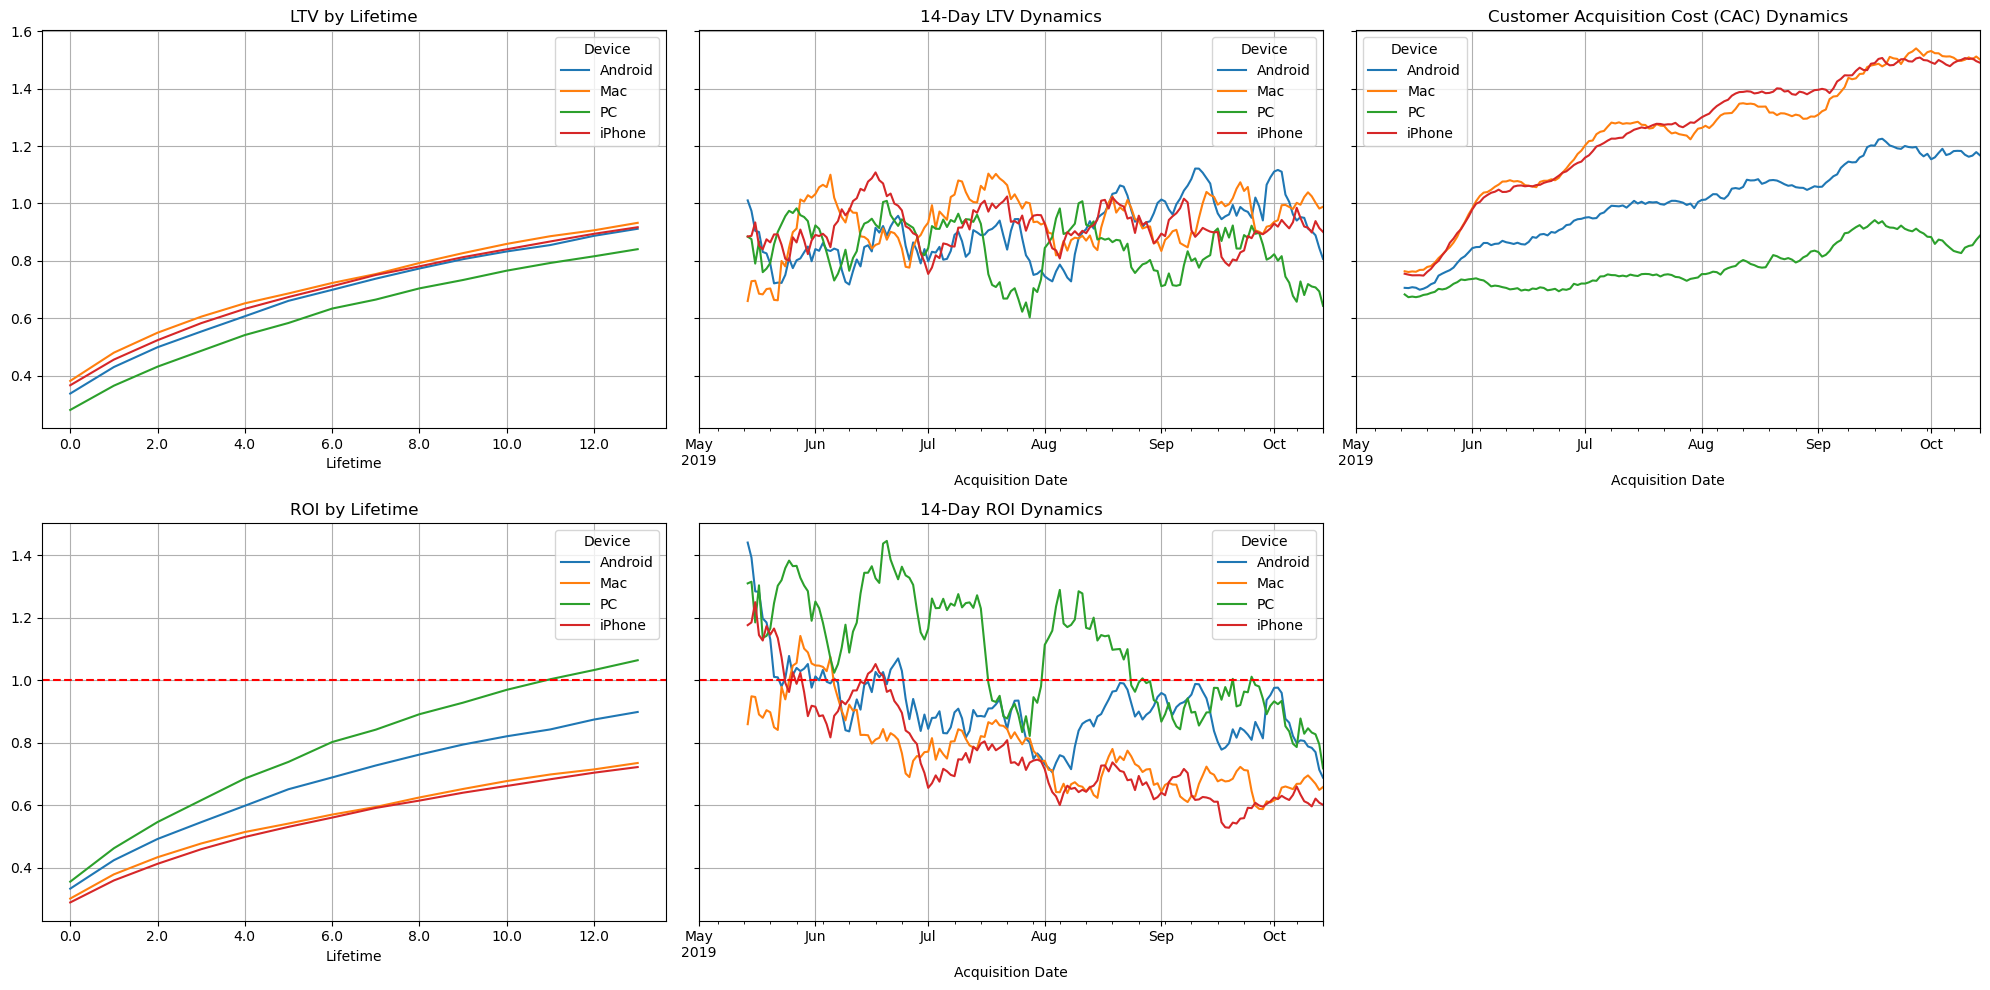

In [68]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    paid_profiles,
    orders,
    observation_date=observation_date,
    horizon_days=horizon_days,
    dimensions=['Device']
)

plot_ltv_roi(
    ltv_grouped,
    ltv_history,
    roi_grouped,
    roi_history,
    horizon=horizon_days, 
    window=14 
)


**Advertising Payback Analysis over a 14-Day Horizon**

To evaluate the effectiveness of advertising investments, the following plots were analyzed:

1. **Cohort-Based Cumulative LTV Plot**  
   Shows how users from different devices generate revenue over the 14 days post-acquisition.  
   - LTV grows most actively for users on **Mac**, **iPhone**, and **Android**.  
   - **PC** users show consistently lower LTV across the entire horizon.  
   - iPhone and Mac lead in revenue, with LTV around 0.95–0.96  
   - Android is slightly lower, ~0.88  
   - PC performs noticeably worse, ~0.82

2. **LTV on Day 14 by Acquisition Date**  
   - Shows how user revenue changed from May to October 2019.  
   - All devices show a fairly volatile pattern across cohorts.  
   - iPhone, Mac, and Android remain in the 0.85–1.5 range — relatively stable  
   - PC underperforms — 0.65–0.8

3. **CAC (Customer Acquisition Cost) Trends**  
   - CAC has been steadily rising for all devices since early June.  
   - **iPhone** and **Mac** show the most significant increase, negatively affecting ROI.  
   - **Android** and **PC** show moderate CAC growth.  

iPhone and Mac are the most expensive devices to acquire users on. While justified by their high LTV, it's not always enough — ROI must be monitored.  
PC is cheap but brings lower revenue, which could be a false economy.

4. **Cohort-Based ROI Plot**  
   Shows how well advertising investments pay off over time.  
   - PC — ROI ~1.05. Break-even reached by Day 13.  
   - Android — ROI ~0.9–0.95  
   - Mac and iPhone — ROI ~0.75–0.8  

PC shows the best ROI despite the weakest LTV — explained by the low acquisition cost.  
Mac and iPhone users are expensive and do not break even within 14 days despite higher revenue.

5. **ROI on Day 14 by Acquisition Date**  
   - PC — maintained ROI > 1 for a while, then declined  
   - Android — ROI fluctuates but stays close to 1  
   - iPhone and Mac — consistently below breakeven (~0.6–0.8)

PC had the most stable ROI, especially in June–July.  
Since late July, all traffic segments have become less profitable, but Mac/iPhone have always been below breakeven.

**Overall Summary:**  
- **PC users** are the most profitable segment over a 14-day horizon.  
- **Android users** show potential if CAC is controlled.  
- **iPhone and Mac acquisition strategies** should



**Regional Advertising ROI Analysis**


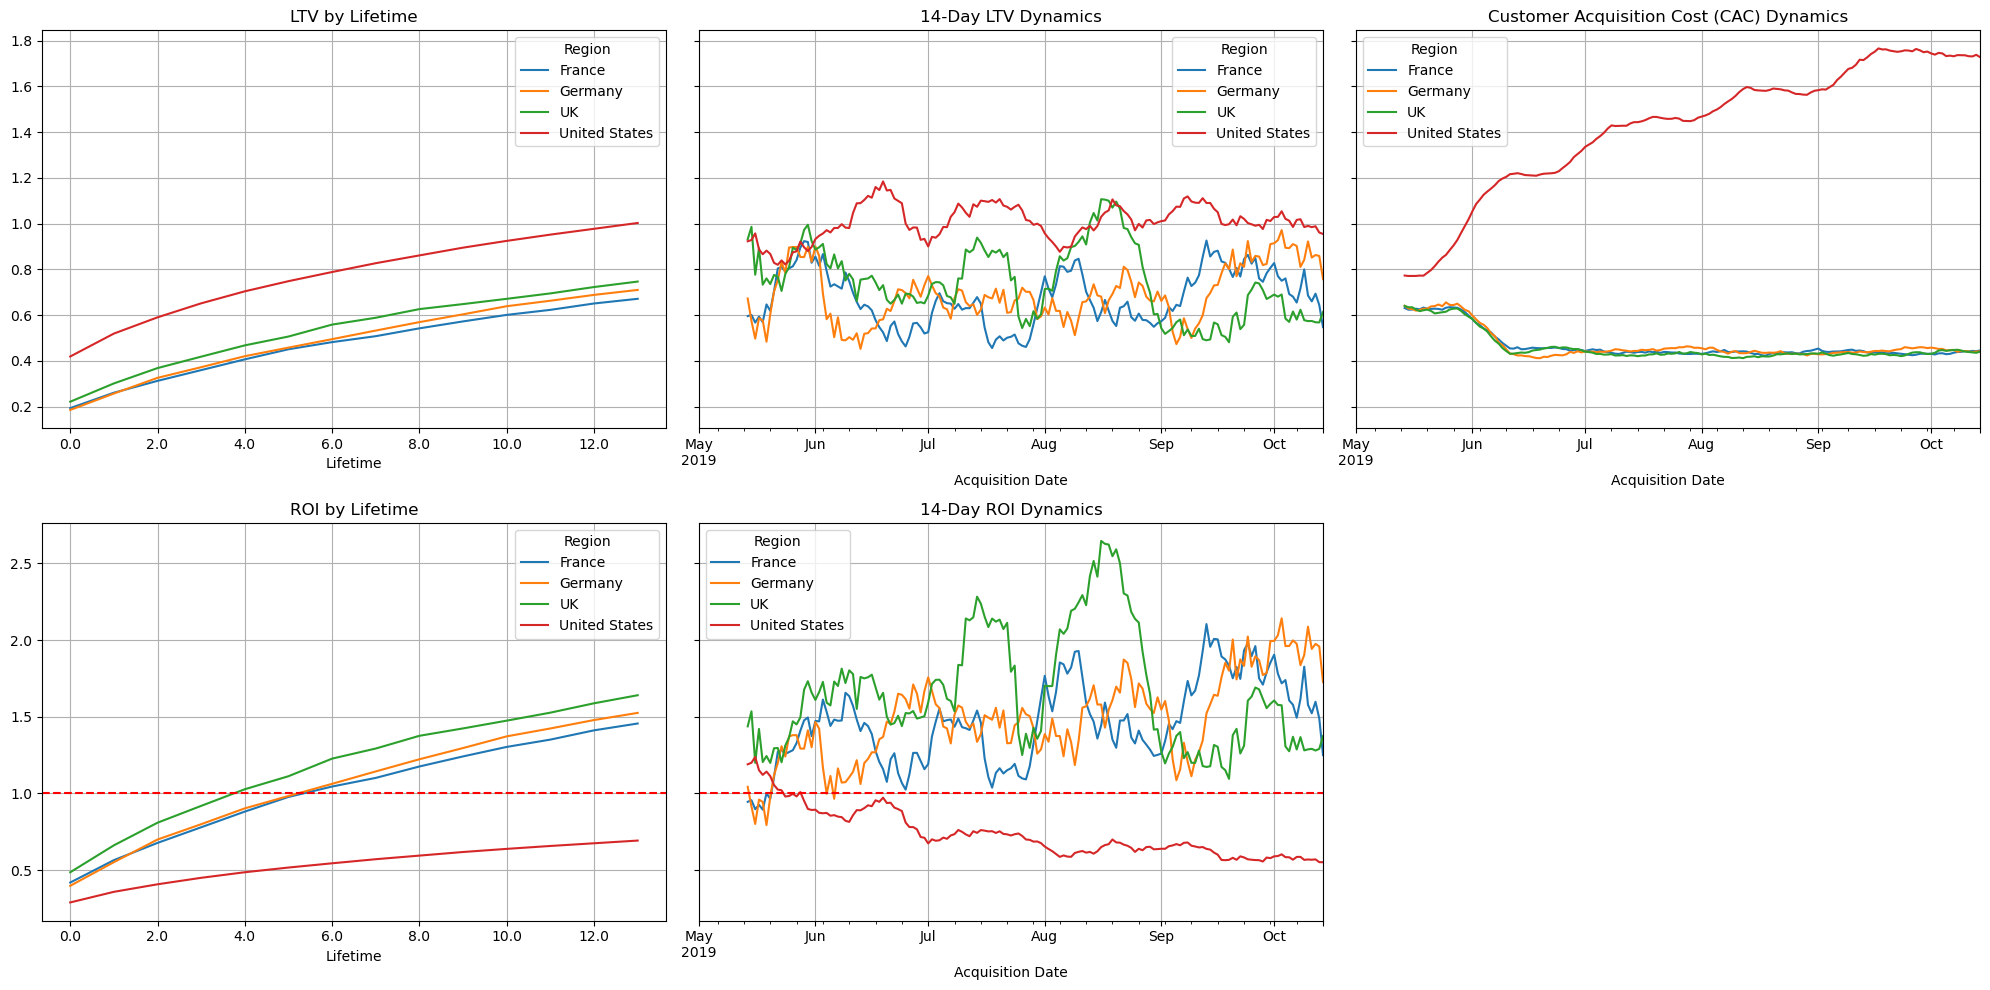

In [71]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    paid_profiles,
    orders,
    observation_date=observation_date,
    horizon_days=horizon_days,
    dimensions=['Region']
)

plot_ltv_roi(
    ltv_grouped,
    ltv_history,
    roi_grouped,
    roi_history,
    horizon=horizon_days,  
    window=14  
)

1. **LTV (Lifetime Value)**  
   - The **USA** shows the highest LTV among all regions — users are more solvent and provide sustained value over 13 days.  
   - **France**, **Germany**, and the **UK** have similar curves, though all are below the USA.  
   - The **UK** slightly outperforms France and Germany.

2. **LTV Dynamics on Day 14**  
   - The USA consistently leads in Day-14 LTV throughout the observed period, despite fluctuations.  
   - The UK and Germany show noticeable spikes in July and August.  
   - France has the most unstable dynamics, with noticeable dips in mid-summer.

3. **CAC (Customer Acquisition Cost)**  
   - The USA stands out sharply — CAC increased significantly in June and remains high.  
   - France, Germany, and the UK show stable and low CAC, with little variation over time.

4. **ROI (Return on Investment)**  
   - Germany and the UK show the best ROI performance, confidently staying above the break-even point (ROI > 1).  
   - France is closer to 1 but still manages to break even.  
   - The USA fails to reach profitability — ROI stays below 1 even by Day 13.

5. **ROI Dynamics on Day 14**  
   - The USA experiences a sharp drop in ROI after June, stabilizing below the break-even threshold.  
   - The UK shows the most volatile ROI curve, but values remain above 1.  
   - Germany and France are more stable, with consistently high ROI values.

**Conclusions:**  
The **USA** is the largest acquisition market but also the most unprofitable: high CAC combined with insufficient LTV results in negative ROI.


**Attribution Channel ROI Evaluation**


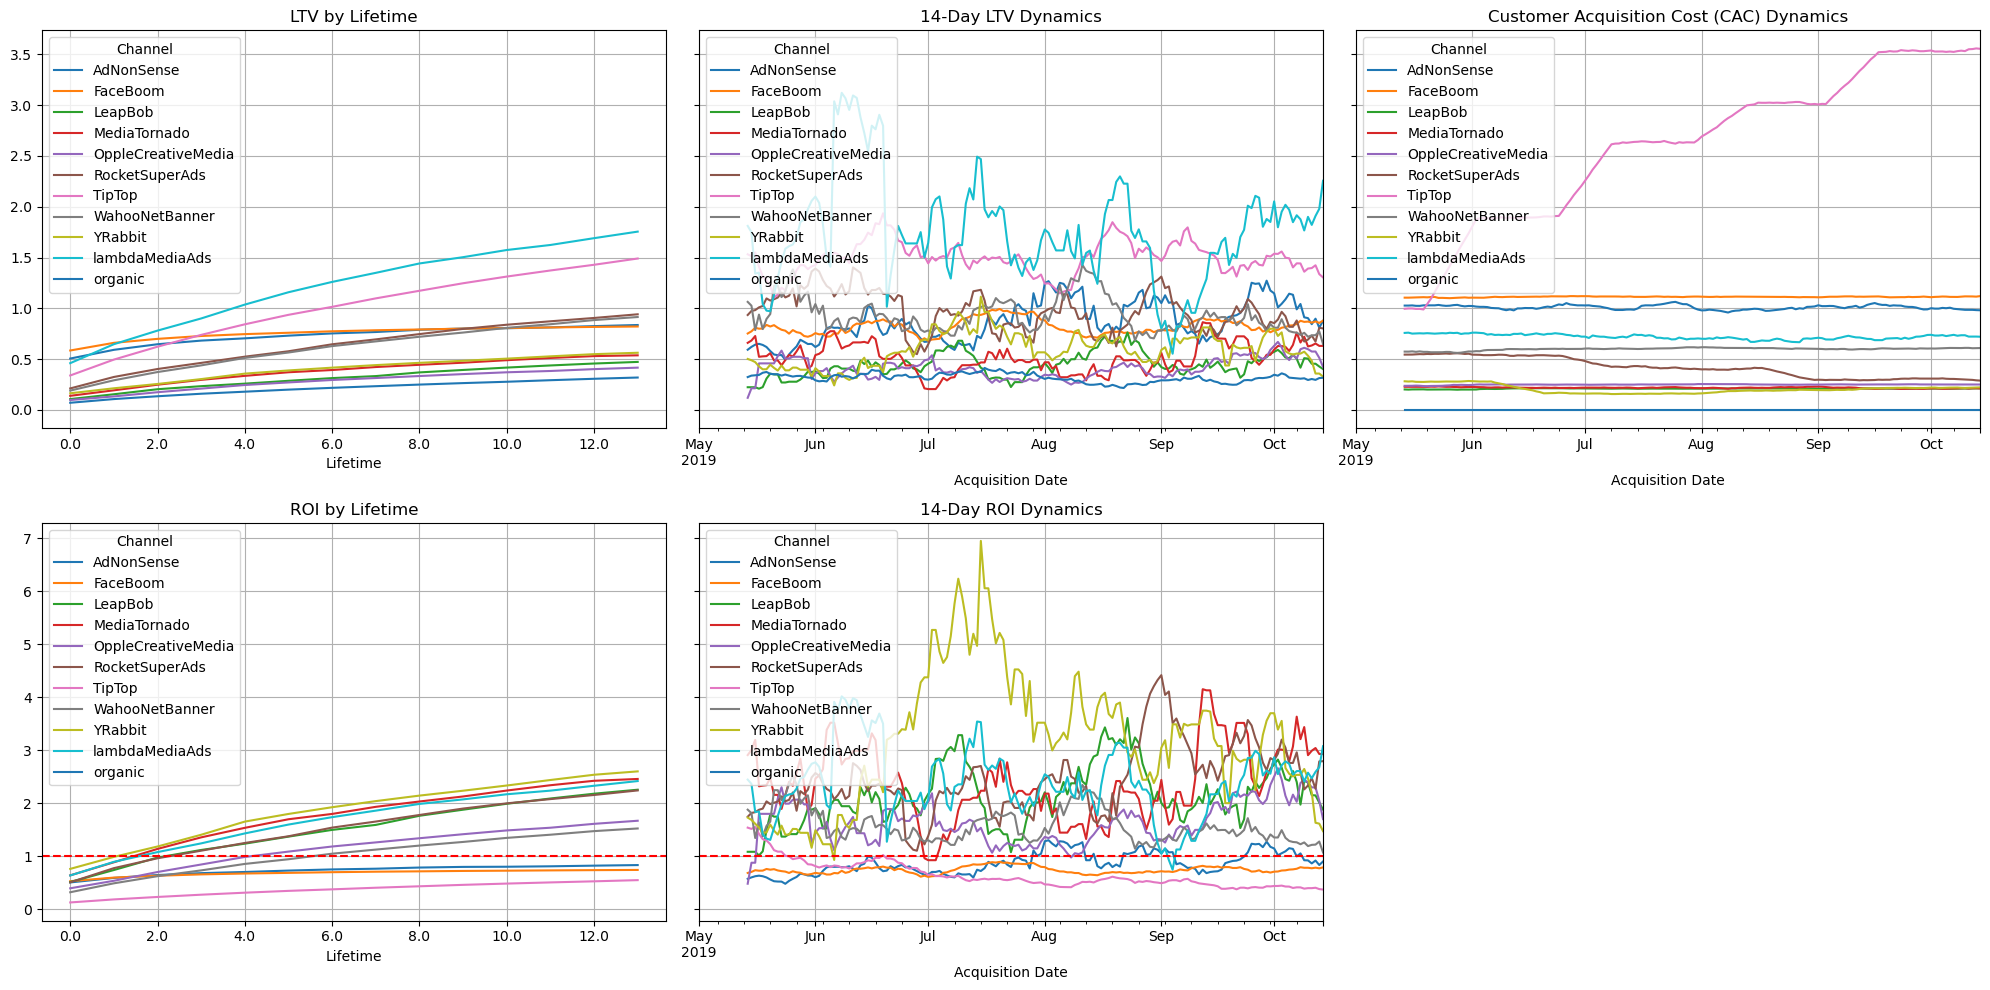

In [74]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles,
    orders,
    observation_date=observation_date,
    horizon_days=horizon_days,
    dimensions=['Channel']
)

plot_ltv_roi(
    ltv_grouped,
    ltv_history,
    roi_grouped,
    roi_history,
    horizon=horizon_days, 
    window=14  
)

In [75]:
ltv_grouped

cohort_size       0.0       1.0       2.0       3.0  \
Channel                                                                   
AdNonSense                 3627  0.505842  0.591701  0.646736  0.682506   
FaceBoom                  26736  0.585225  0.660526  0.699576  0.727986   
LeapBob                    7875  0.106979  0.154507  0.203931  0.233968   
MediaTornado               4081  0.139160  0.193208  0.248478  0.296187   
OppleCreativeMedia         7890  0.097778  0.133200  0.174574  0.209995   
RocketSuperAds             4142  0.211828  0.324616  0.402924  0.463160   
TipTop                    17953  0.339244  0.495530  0.622461  0.738886   
WahooNetBanner             7832  0.190400  0.291862  0.373038  0.438666   
YRabbit                    3990  0.164133  0.213160  0.255682  0.303709   
lambdaMediaAds             2012  0.460413  0.647013  0.780939  0.900542   
organic                   52627  0.070685  0.106949  0.134755  0.159525   

                         4.0       5.0       6.0       7.0       8.0  \
Channel                                                                
AdNonSense          0.704795  0.731219  0.753231  0.766989  0.789010   
FaceBoom            0.746280  0.759719  0.774128  0.784471  0.791976   
LeapBob             0.258935  0.286817  0.313557  0.333328  0.369470   
MediaTornado        0.335582  0.371044  0.393053  0.422401  0.444416   
OppleCreativeMedia  0.245550  0.270848  0.294882  0.314236  0.333853   
RocketSuperAds      0.524363  0.577612  0.646306  0.694498  0.746564   
TipTop              0.842855  0.936257  1.014870  1.098211  1.172935   
WahooNetBanner      0.512196  0.565208  0.628326  0.674837  0.720333   
YRabbit             0.357511  0.388777  0.416291  0.441306  0.463817   
lambdaMediaAds      1.036998  1.158529  1.260214  1.349498  1.441764   
organic             0.179706  0.199943  0.217639  0.233797  0.249671   

                         9.0      10.0      11.0      12.0      13.0  
Channel                                                               
AdNonSense          0.801392  0.804420  0.812674  0.825057  0.836071  
FaceBoom            0.800413  0.805864  0.812023  0.817253  0.821359  
LeapBob             0.393549  0.416996  0.437907  0.456917  0.472758  
MediaTornado        0.465202  0.489659  0.511669  0.530010  0.537594  
OppleCreativeMedia  0.352828  0.370663  0.383439  0.401791  0.416337  
RocketSuperAds      0.797658  0.838860  0.872595  0.905365  0.941507  
TipTop              1.247046  1.312756  1.372683  1.428893  1.490434  
WahooNetBanner      0.761749  0.807750  0.843813  0.884594  0.914668  
YRabbit             0.483827  0.505088  0.527604  0.549115  0.562872  
lambdaMediaAds      1.503767  1.574205  1.623807  1.690785  1.755273  
organic             0.264216  0.277456  0.292727  0.306686  0.319070

1. **LTV (Lifetime Value)**  
   - Top performers: **lambdamedias**, **TipTop** — these channels lead in cumulative revenue per user, steadily growing and reaching LTV > 1.0 by day 14.  
   - Underperformers: **organic**, **OppleCreativeMedia**, **LeapBob**, **MediaTornado**, and **YRabbit** — all show low LTV (< 0.5) throughout the lifetime. Organic grows barely at all, which is typical for free, low-monetization traffic.

2. **CAC (Customer Acquisition Cost)**  
   - Most expensive channel: **TipTop** — CAC is very high, increasing steadily and reaching ~3.5 units (likely tied to the US market).  
   - Other acquisition channels demonstrate relatively stable costs across cohorts.  
   - The cheapest paid channels: **YRabbit** and **LeapBob**.

3. **ROI (Return on Investment)**  
   - **YRabbit** has the highest ROI among all channels, with a peak profitability during summer.  
   - **TipTop** has the lowest ROI due to its high acquisition cost.  
   - Other unprofitable channels include **TipTop**, **FaceBoom**, and **AdNonSense**.


**Оценка конверсии**

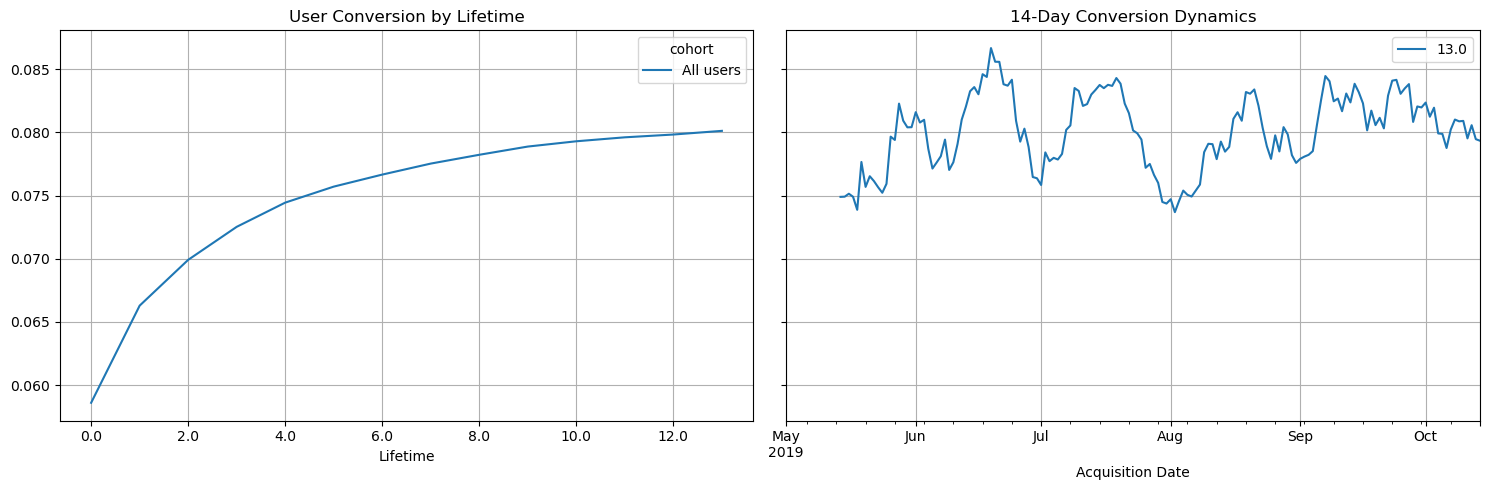

In [78]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    paid_profiles,
    orders,
    observation_date=observation_date,
    horizon_days=horizon_days
)

plot_conversion(
    conversion_grouped,
    conversion_history,
    horizon=horizon_days,
    window=14
)


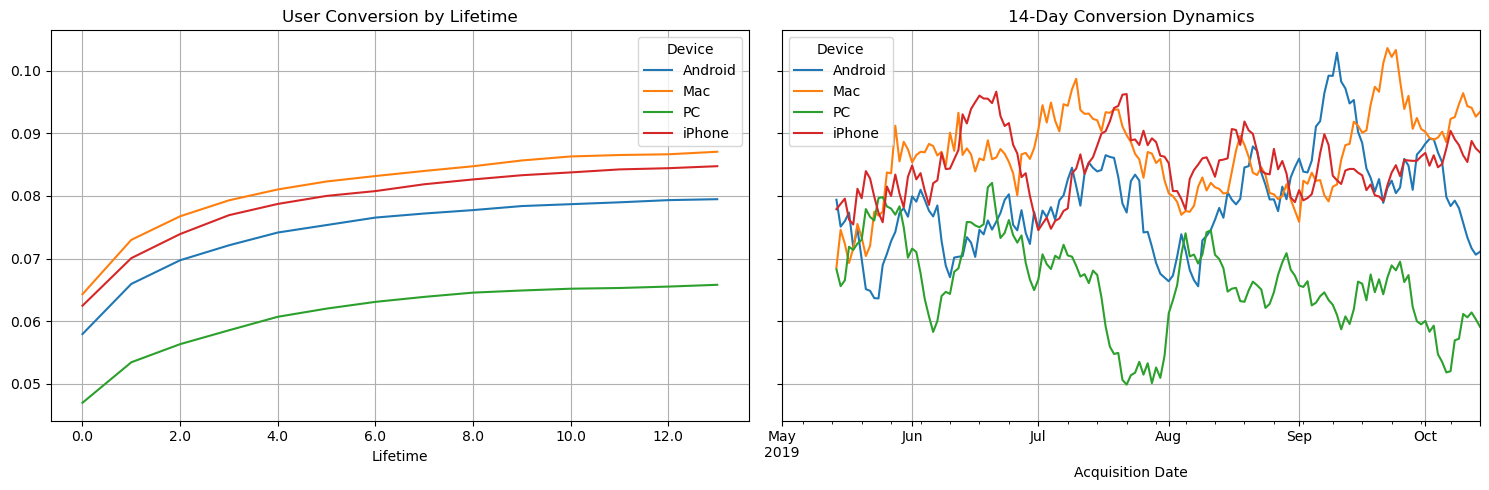

In [79]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    paid_profiles,
    orders,
    observation_date=observation_date,
    horizon_days=horizon_days,
    dimensions=['Device']
)

plot_conversion(
    conversion_grouped,
    conversion_history,
    horizon=horizon_days,
    window=14
)


**User Conversion Graph Analysis**

The left chart shows how the share of users who placed an order evolves by day after acquisition, segmented by device type.

**Observations:**
- **Mac** and **iPhone** demonstrate the highest cumulative conversion rates.
- **Android** performs moderately, noticeably behind iPhone.
- **PC** consistently shows the lowest conversion across all days.
- Conversion growth **slows after day 10–13**, suggesting most user activity occurs early in the lifecycle.



**14-Day Conversion Dynamics (by Cohort)**

The right chart illustrates how conversion on day 14 changes over time, segmented by acquisition date and device type.

**Observations:**
- **June–July** shows the peak conversion values across all devices.
- **iPhone** and **Mac** maintain high and stable conversions throughout.
- **Android** and **PC** are more volatile, especially in August and September.


**Conclusions and Hypotheses**

- **iPhone** and **Mac** are the most promising platforms, offering high and stable conversion.
- **Android** and **PC** require further investigation:

**June–July Conversion Peak**  
Possible causes:
- Promo or marketing campaigns
- Seasonality
- Product updates or releases

**Next Steps:**
- Analyze traffic sources by device
- Study the user journey for Android and PC users
- Investigate potential events or changes that may have led to the September drop


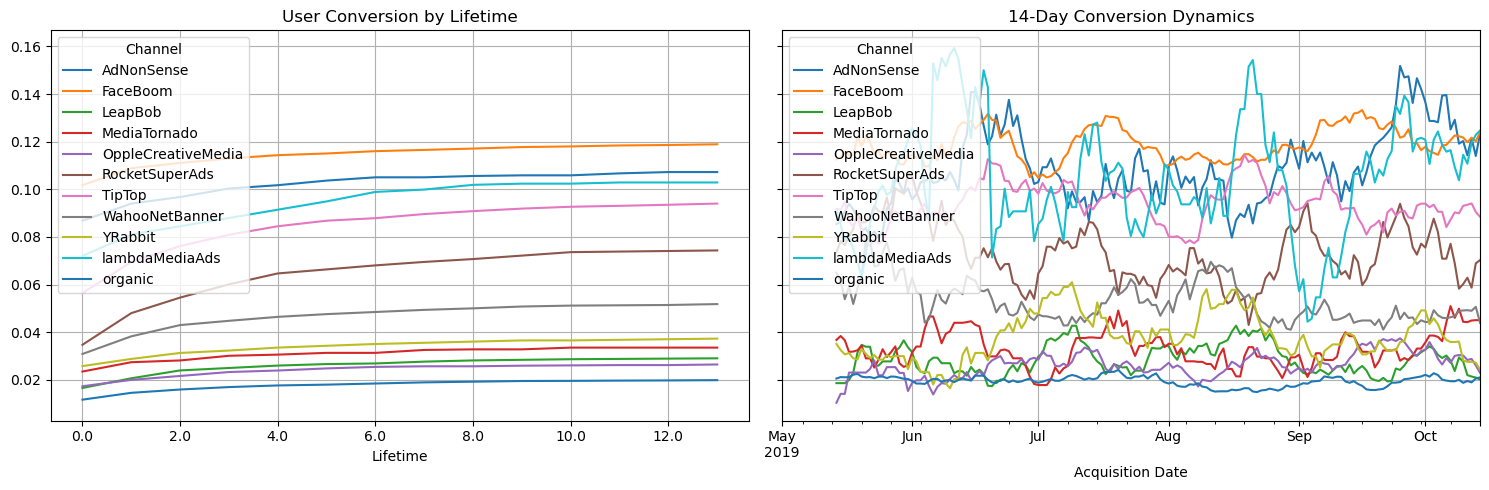

In [81]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date=observation_date,
    horizon_days=horizon_days,
    dimensions=['Channel']
)

plot_conversion(
    conversion_grouped,
    conversion_history,
    horizon=horizon_days,
    window=14
)

**User Conversion Analysis by Traffic Source**


**Cumulative Conversion over Lifetime**

The left chart shows how user conversion accumulates over time (by day since acquisition), segmented by advertising channel.

**Top 5 Channels by Cumulative Conversion:**
1. **FaceBoom** — **Leader across all days**, conversion approaches **0.12–0.13**
2. **lambdaMediaAds**
3. **TipTop**
4. **RocketSuperAds**

**Underperformers:**
- **organic** — lowest conversion rate (**< 0.025**)
- **MediaTornado**, **LeapBob**, **OppleCreativeMedia** — all remain below **0.04**


**14-Day Conversion Dynamics**

The right chart shows how conversion on day 14 fluctuates depending on user acquisition date.

**Observations:**
- **lambdaMediaAds** shows **sharp spikes** in August and September — possibly due to **aggressive campaigns**
- **FaceBoom** maintains **high and stable conversion** throughout
- **RocketSuperAds** and **TipTop** — show **minor variations**
- **organic** remains **consistently low**, with little movement


**Conclusions and Hypotheses**

**High-Performing Channels:**
- **FaceBoom**, **lambdaMediaAds**, **AdNonSense** show strong performance both in **cumulative** and **point-in-time** conversions  
- Consider **increasing budgets** or **deepening segmentation** to uncover high-performing combinations

**Risks:**
- **lambdaMediaAds** is **volatile** despite high conversion — further investigation needed on **ad creatives** and **traffic quality**

**Recommendations:**
- **Analyze CAC (Customer Acquisition Cost)** to assess profitability
- **Segment users** within each channel for more granular insight
- **Review impact of marketing campaigns** and product changes on performance



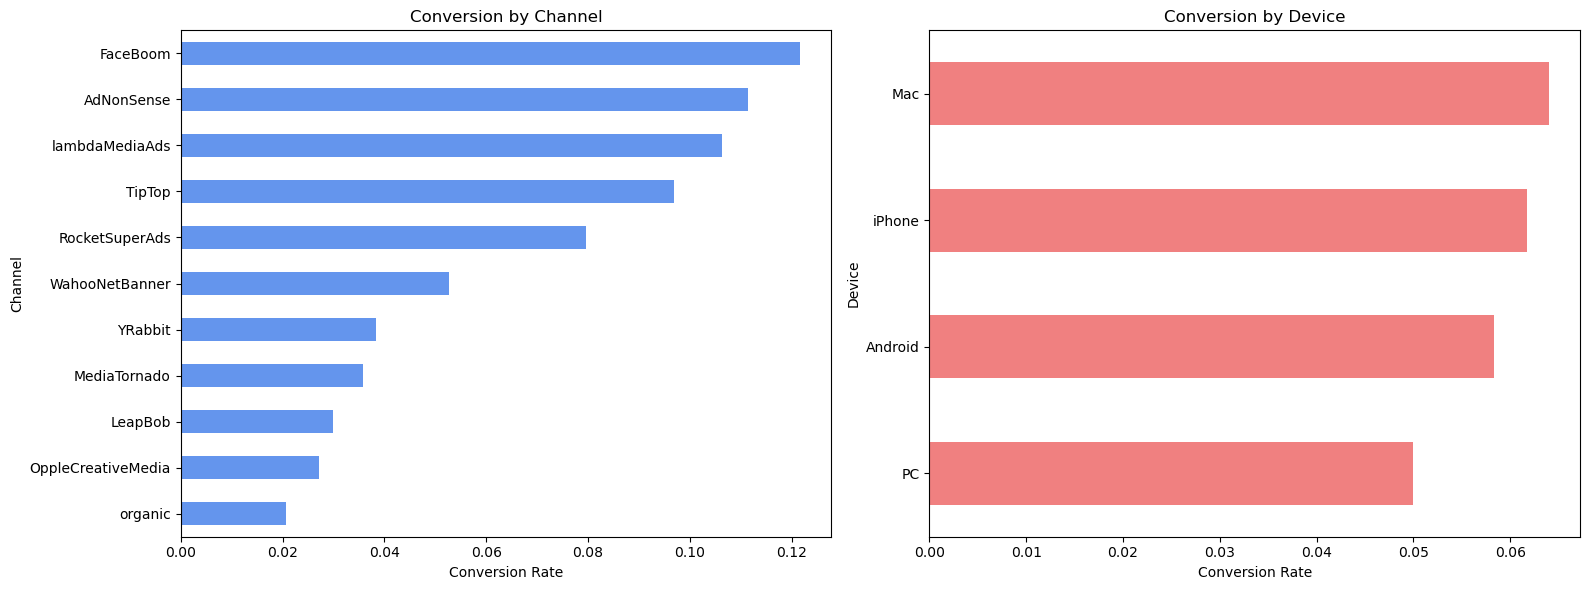

In [83]:
# Calculate conversion by channels
channel_conversion = (
    conversion_raw.groupby('Channel')
    .agg(users=('User Id', 'nunique'),
         payers=('payer', 'sum'))
    .assign(conversion=lambda df: df['payers'] / df['users'])
    .sort_values('conversion', ascending=False)
)

# Same for devices
device_conversion = (
    conversion_raw.groupby('Device')
    .agg(users=('User Id', 'nunique'),
         payers=('payer', 'sum'))
    .assign(conversion=lambda df: df['payers'] / df['users'])
    .sort_values('conversion', ascending=False)
)

# Set up figure size and number of plots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot conversion by channels
channel_conversion['conversion'].plot(kind='barh', ax=axs[0], color='cornflowerblue')
axs[0].set_title('Conversion by Channel')
axs[0].set_xlabel('Conversion Rate')
axs[0].invert_yaxis()

# Plot conversion by devices
device_conversion['conversion'].plot(kind='barh', ax=axs[1], color='lightcoral')
axs[1].set_title('Conversion by Device')
axs[1].set_xlabel('Conversion Rate')
axs[1].invert_yaxis()

# Adjust layout and show plots
plt.tight_layout()
plt.show()



**Conclusions and Recommendations**

- **FaceBoom**, **lambdaMediaAds**, and **AdNonSense** are promising channels for scaling.
- Additional analysis should be conducted for channels with **low conversion rates**.
- **Mac** and **iPhone** are optimal devices to focus advertising campaigns on.
- **PC** may require UX improvements, landing page optimization, or a review of creatives.



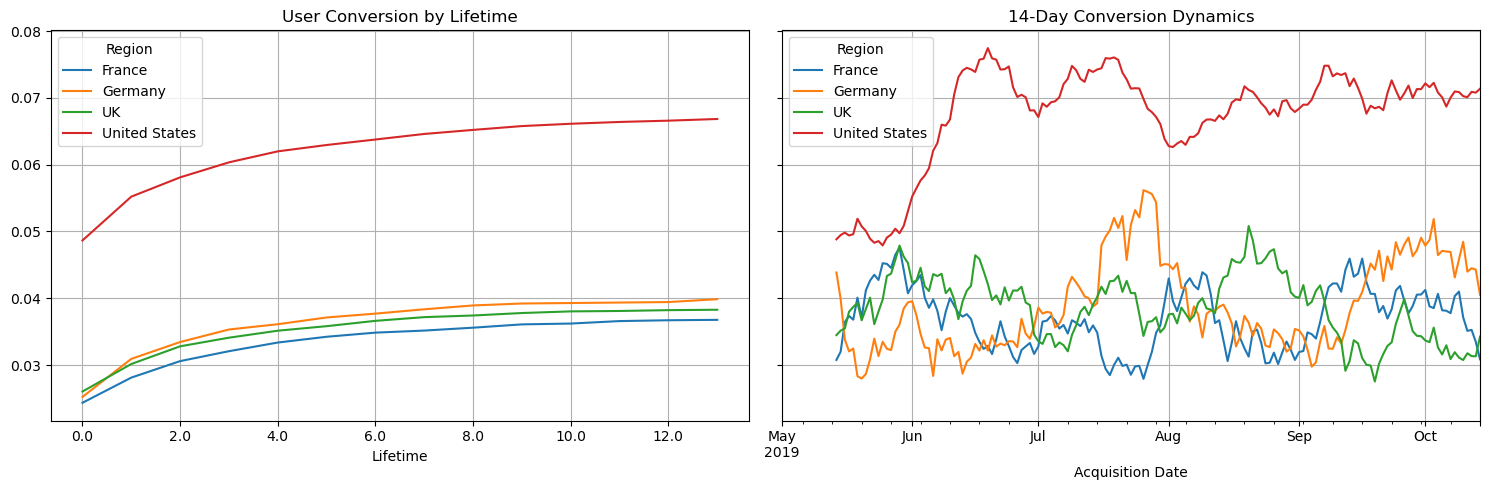

In [85]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date=observation_date,
    horizon_days=horizon_days,
    dimensions=['Region']
)

plot_conversion(
    conversion_grouped,
    conversion_history,
    horizon=horizon_days,
    window=14
)

**Conversion Analysis by Country**

The United States shows stable and high conversion over time, unlike European countries, where noticeable fluctuations are observed. This may indicate higher-quality traffic, a better product-market fit, or a more attractive marketing strategy. It’s also important to consider the traffic acquisition sources in each individual market.


In [87]:
# Group by channel and region, summing acquisition cost
channel_region_costs = (
    profiles
    .groupby(['Channel', 'Region'], as_index=False)
    .agg(total_cost=('acquisition_cost', 'sum'))
)

# Pivot to prepare for heatmap
cost_pivot = channel_region_costs.pivot(index='Channel', columns='Region', values='total_cost')

# Convert absolute values to shares within each country
cost_share = cost_pivot.div(cost_pivot.sum(axis=0), axis=1)

# Group by region and channel, calculate conversion
channel_region_conv = (
    profiles
    .groupby(['Region', 'Channel'])
    .agg(users=('User Id', 'nunique'),
         payers=('payer', 'sum'))
    .assign(conversion=lambda df: df['payers'] / df['users'])
    .reset_index()
)

# Pivot for heatmap
pivot_table = channel_region_conv.pivot(index='Channel', columns='Region', values='conversion')



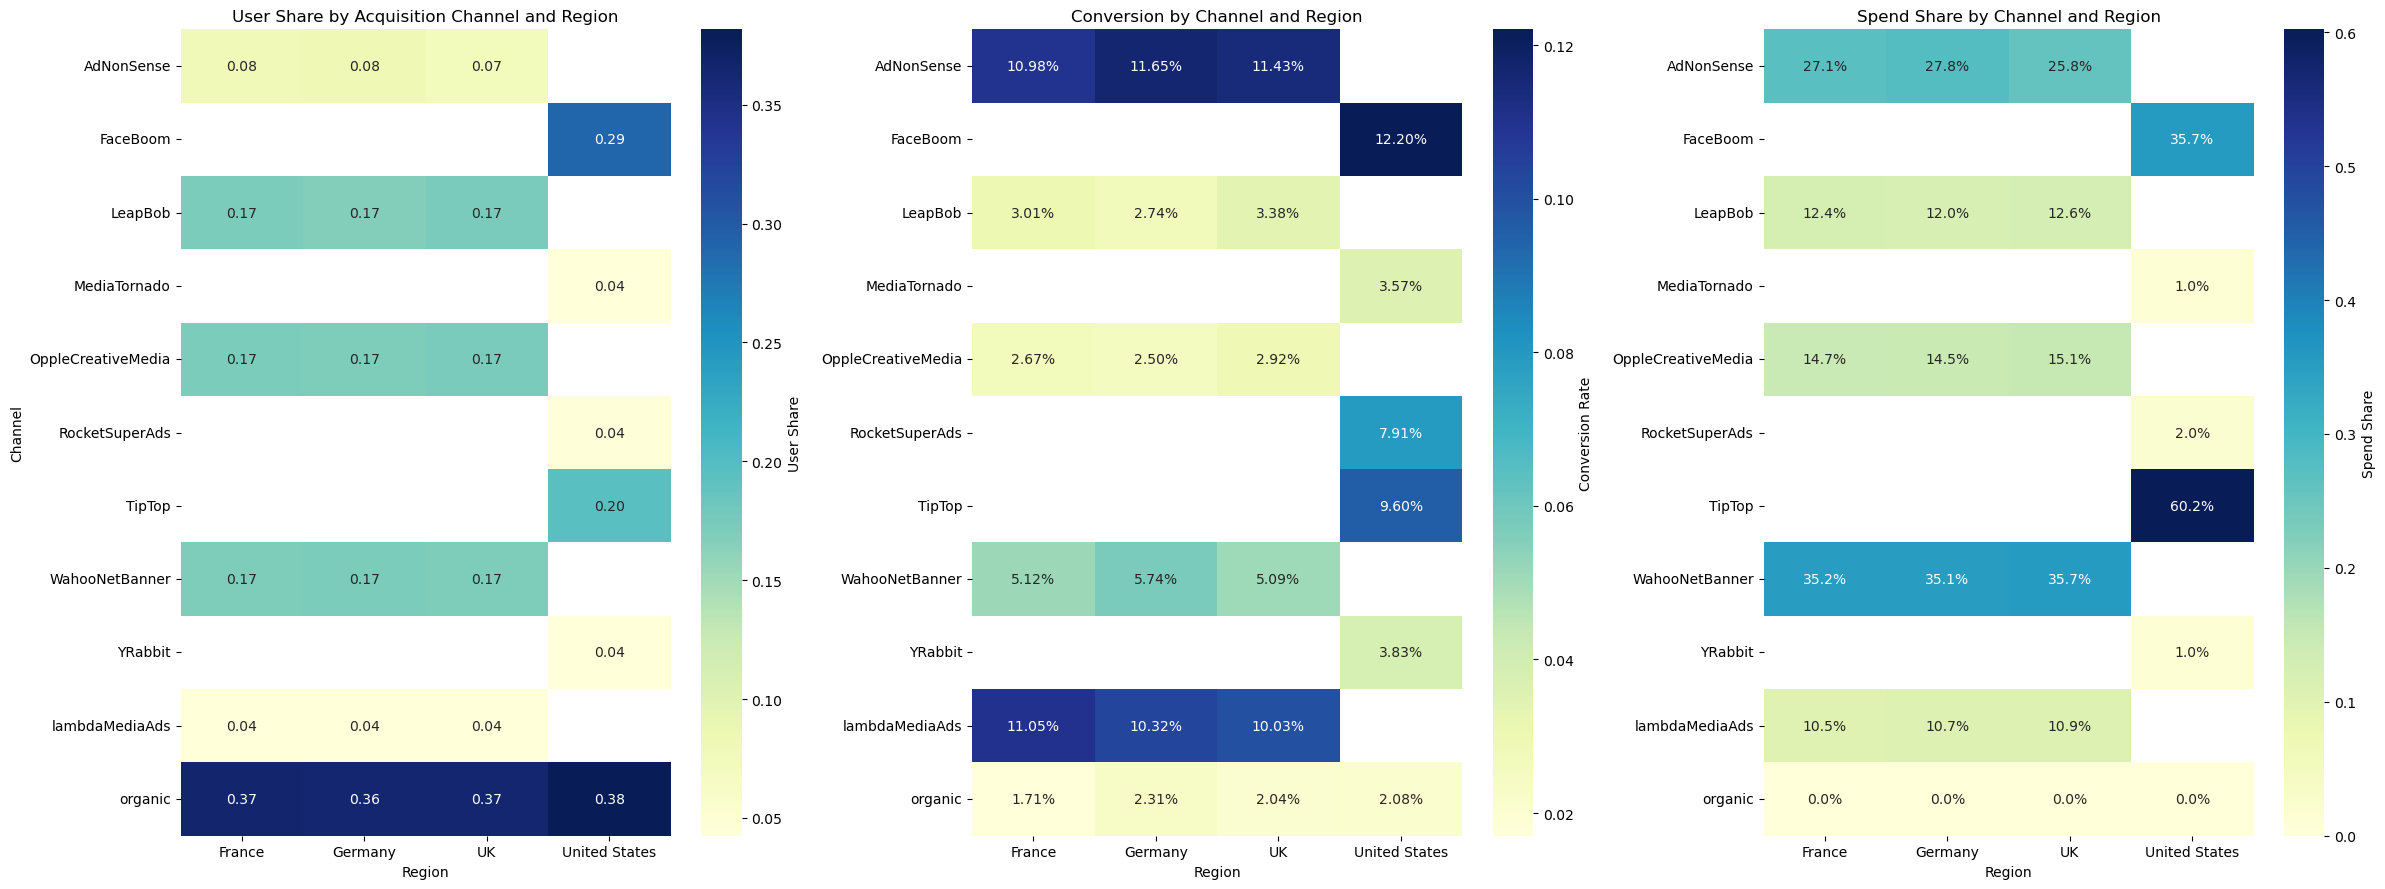

In [88]:
fig, axs = plt.subplots(1, 3, figsize=(24, 9))

# User share by channel and region ---
sns.heatmap(
    heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu",
    ax=axs[0], cbar_kws={'label': 'User Share'}
)
axs[0].set_title('User Share by Acquisition Channel and Region')
axs[0].set_xlabel('Region')
axs[0].set_ylabel('Channel')

# Conversion by channel and region ---
sns.heatmap(
    pivot_table, annot=True, fmt=".2%", cmap="YlGnBu",
    ax=axs[1], cbar_kws={'label': 'Conversion Rate'}
)
axs[1].set_title('Conversion by Channel and Region')
axs[1].set_xlabel('Region')
axs[1].set_ylabel('')

# Spend share by channel and region ---
sns.heatmap(
    cost_share, annot=True, fmt=".1%", cmap="YlGnBu",
    ax=axs[2], cbar_kws={'label': 'Spend Share'}
)
axs[2].set_title('Spend Share by Channel and Region')
axs[2].set_xlabel('Region')
axs[2].set_ylabel('')

plt.tight_layout()
plt.show()




**Attribution Channel Analysis by Region**

**Chart 1 — User Share by Acquisition Channel per Region**

Shows how users are distributed across channels within each region.

- In **USA**, 29% of users came from **FaceBoom**, and 38% from **organic**.
- **Organic** consistently dominates in all countries.
- Paid channels in Europe have relatively even distribution.

**Chart 2 — Conversion Rate by Channel and Region**

Illustrates the share of paying users relative to the total number of acquired users per channel.

- **FaceBoom** and **AdNonSense** show the highest conversion rates — over **10%** across all regions.
- **Organic** performs the worst — below **2.5%** conversion in every country.
- **LambdaMediaAds** achieves high conversion (**10–11%**) despite low reach.
- **TipTop** and **RocketSuperAds** show decent performance in **USA**.

**Chart 3 — Budget Share by Channel and Region**

Shows how much of each region’s marketing budget is allocated to each channel.

- In **USA**, there is a strong concentration of budget:
  - **TipTop** receives **60.2%** of total spending, despite lower conversion than **FaceBoom**.
- In **Europe**, spending is more evenly spread across **5–6 key channels**.
- The most expensive channels in Europe are **WahooNetBanner** and **AdNonSense**.
- **Organic** has **zero costs**, as it is a free source.

**Insights and Takeaways**

- **High spend ≠ high efficiency**: for example, **TipTop** in the USA consumes **60% of the budget**, but its conversion rate (**9.6%**) is lower than **FaceBoom (12.2%)**.
- **FaceBoom** shows a good balance between cost and conversion.
- **LambdaMediaAds** deserves further attention — strong performance with minimal cost.
- **Organic** brings high traffic but poor conversion. Consider **landing page optimization** or **retargeting**.




**Retention Analysis by Country**


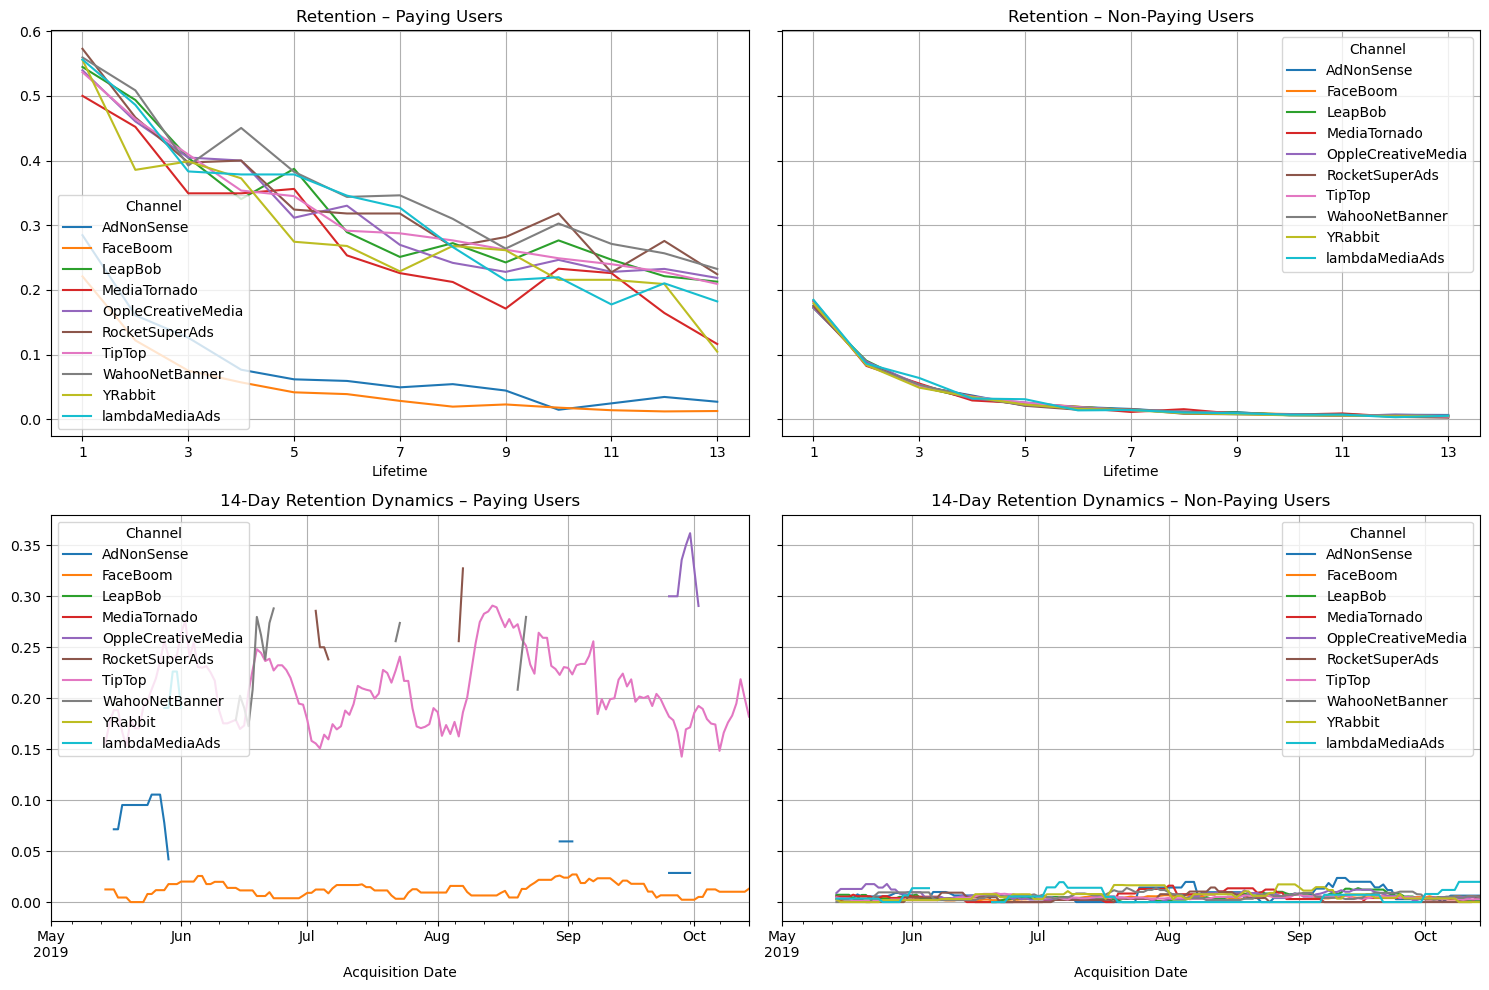

In [91]:
retention_raw, retention_grouped, retention_history = get_retention(
    paid_profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['Channel']  
)

plot_retention(
    retention_grouped,
    retention_history,
    horizon=horizon_days,
    window=14  # сглаживание — можно менять
)


In [92]:
# Let's take another look at the LTV for FaceBoom and TipTop
ltv_raw, ltv_grouped, _, _, _ = get_ltv(
    profiles=paid_profiles,
    purchases=orders,
    observation_date=observation_date,
    horizon_days=14,
    dimensions=['Channel']
)

faceboom_ltv = ltv_grouped.query("Channel == 'FaceBoom'")
tiptop_ltv = ltv_grouped.query("Channel == 'TipTop'")


In [93]:
print("\n=== retention по device ===")
display(retention_grouped)
print("\n=== faceboom_ltv ===")
display(faceboom_ltv)
print("\n=== tiptop_ltv ===")
display(tiptop_ltv)



=== retention по device ===


cohort_size    0         1         2         3  \
payer Channel                                                              
False AdNonSense                 3223  1.0  0.176233  0.088117  0.051505   
      FaceBoom                  23483  1.0  0.173530  0.087382  0.050718   
      LeapBob                    7640  1.0  0.172120  0.090707  0.051047   
      MediaTornado               3935  1.0  0.182211  0.082592  0.055400   
      OppleCreativeMedia         7675  1.0  0.172248  0.089251  0.053420   
      RocketSuperAds             3812  1.0  0.174974  0.086569  0.052204   
      TipTop                    16214  1.0  0.181386  0.084557  0.051314   
      WahooNetBanner             7419  1.0  0.184122  0.084513  0.053511   
      YRabbit                    3837  1.0  0.179307  0.083920  0.048997   
      lambdaMediaAds             1798  1.0  0.184650  0.086207  0.063960   
True  AdNonSense                  404  1.0  0.284653  0.160891  0.126238   
      FaceBoom                   3253  1.0  0.221027  0.122041  0.075315   
      LeapBob                     235  1.0  0.544681  0.493617  0.404255   
      MediaTornado                146  1.0  0.500000  0.452055  0.349315   
      OppleCreativeMedia          215  1.0  0.539535  0.460465  0.404651   
      RocketSuperAds              330  1.0  0.572727  0.466667  0.396970   
      TipTop                     1739  1.0  0.536515  0.464060  0.409431   
      WahooNetBanner              413  1.0  0.559322  0.508475  0.392252   
      YRabbit                     153  1.0  0.555556  0.385621  0.398693   
      lambdaMediaAds              214  1.0  0.556075  0.485981  0.383178   

                                 4         5         6         7         8  \
payer Channel                                                                
False AdNonSense          0.036922  0.021409  0.019237  0.016134  0.011170   
      FaceBoom            0.032406  0.024954  0.019589  0.013712  0.011753   
      LeapBob             0.031937  0.023429  0.019241  0.014660  0.010864   
      MediaTornado        0.029225  0.024905  0.018043  0.011436  0.015756   
      OppleCreativeMedia  0.032052  0.026189  0.018632  0.014593  0.011987   
      RocketSuperAds      0.035939  0.020986  0.014953  0.016002  0.008657   
      TipTop              0.035031  0.025780  0.018749  0.014124  0.011903   
      WahooNetBanner      0.033832  0.021971  0.017523  0.015366  0.011861   
      YRabbit             0.034402  0.022935  0.016158  0.014334  0.009382   
      lambdaMediaAds      0.032258  0.031146  0.013904  0.014461  0.010567   
True  AdNonSense          0.076733  0.061881  0.059406  0.049505  0.054455   
      FaceBoom            0.057178  0.041808  0.039041  0.028589  0.019674   
      LeapBob             0.340426  0.387234  0.289362  0.251064  0.272340   
      MediaTornado        0.349315  0.356164  0.253425  0.226027  0.212329   
      OppleCreativeMedia  0.400000  0.311628  0.330233  0.269767  0.241860   
      RocketSuperAds      0.400000  0.324242  0.318182  0.318182  0.266667   
      TipTop              0.353652  0.345026  0.291547  0.287522  0.276596   
      WahooNetBanner      0.450363  0.382567  0.343826  0.346247  0.309927   
      YRabbit             0.372549  0.274510  0.267974  0.228758  0.267974   
      lambdaMediaAds      0.378505  0.378505  0.345794  0.327103  0.266355   

                                 9        10        11        12        13  
payer Channel                                                               
False AdNonSense          0.011170  0.006205  0.005585  0.007136  0.006826  
      FaceBoom            0.009879  0.008261  0.005493  0.006728  0.004471  
      LeapBob             0.010471  0.007461  0.006675  0.005366  0.004712  
      MediaTornado        0.008640  0.007370  0.009149  0.004320  0.004828  
      OppleCreativeMedia  0.008339  0.008078  0.005472  0.007296  0.005733  
      RocketSuperAds      0.007870  0.007083  0.008395  0.003935  0.002623  
      TipTop        


=== faceboom_ltv ===


cohort_size       0.0       1.0       2.0       3.0      4.0  \
Channel                                                                  
FaceBoom        26736  0.585225  0.660526  0.699576  0.727986  0.74628   

               5.0       6.0       7.0       8.0       9.0      10.0  \
Channel                                                                
FaceBoom  0.759719  0.774128  0.784471  0.791976  0.800413  0.805864   

              11.0      12.0      13.0  
Channel                                 
FaceBoom  0.812023  0.817253  0.821359


=== tiptop_ltv ===


cohort_size       0.0      1.0       2.0       3.0       4.0  \
Channel                                                                 
TipTop         17953  0.339244  0.49553  0.622461  0.738886  0.842855   

              5.0      6.0       7.0       8.0       9.0      10.0      11.0  \
Channel                                                                        
TipTop   0.936257  1.01487  1.098211  1.172935  1.247046  1.312756  1.372683   

             12.0      13.0  
Channel                      
TipTop   1.428893  1.490434

**FaceBoom**  
The lowest retention among all channels.

By day 2–3, less than 25% of paying users remain, and by day 14 the metric approaches zero. A similar pattern is observed for AdNonSense.

The dynamic graph shows that retention remains consistently low over time, with no improvements even as the acquisition period changes.

**FaceBoom Summary:**

Low ROI is explained by poor traffic quality — paying users churn quickly. Despite stable acquisition costs and stable LTV, low retention prevents users from delivering long-term value. Either retention mechanisms need to be improved, or the share of traffic from FaceBoom should be reduced.

The FaceBoom source shows stable LTV despite declining retention, which may seem contradictory at first glance. However, detailed user behavior analysis shows that most purchases occur in the first few days after acquisition. **By day 13, LTV reaches 0.825, but 71% of that (0.585 out of 0.825) is generated on the first day, and over 85% within the first 3 days.**  
Users from this channel tend to make a quick — often large — payment, but rarely return afterward. Thus, even though retention declines, the key portion of revenue is captured early in the user lifecycle, maintaining LTV stability. However, due to low retention and rising acquisition costs, users bring little long-term value, making this source inefficient from an ROI perspective.



**TipTop**  
**Paying user retention**
- TipTop starts with relatively high retention — around 0.55 on day 1.

- However, by day 2–3, a sharp drop occurs — by day 5 retention falls to 0.3, and then gradually declines to ~0.2–0.15.

- Still, TipTop performs better than FaceBoom and belongs to the mid-range group in terms of retention.

**TipTop Summary:**

TipTop shows relatively strong retention of paying users, especially compared to FaceBoom. However, the 14-day retention trend shows a wave-like pattern, which may indicate traffic quality instability within the channel. At the same time, rising acquisition costs (CAC) are making ROI increasingly fragile. The key issue is that despite fair retention, LTV grows slowly — and at a high cost per user, the channel becomes unprofitable. A possible reason might be the TipTop audience’s high sensitivity to external stimuli combined with a limited long-term interest in the product.


**Retention Analysis by Country**


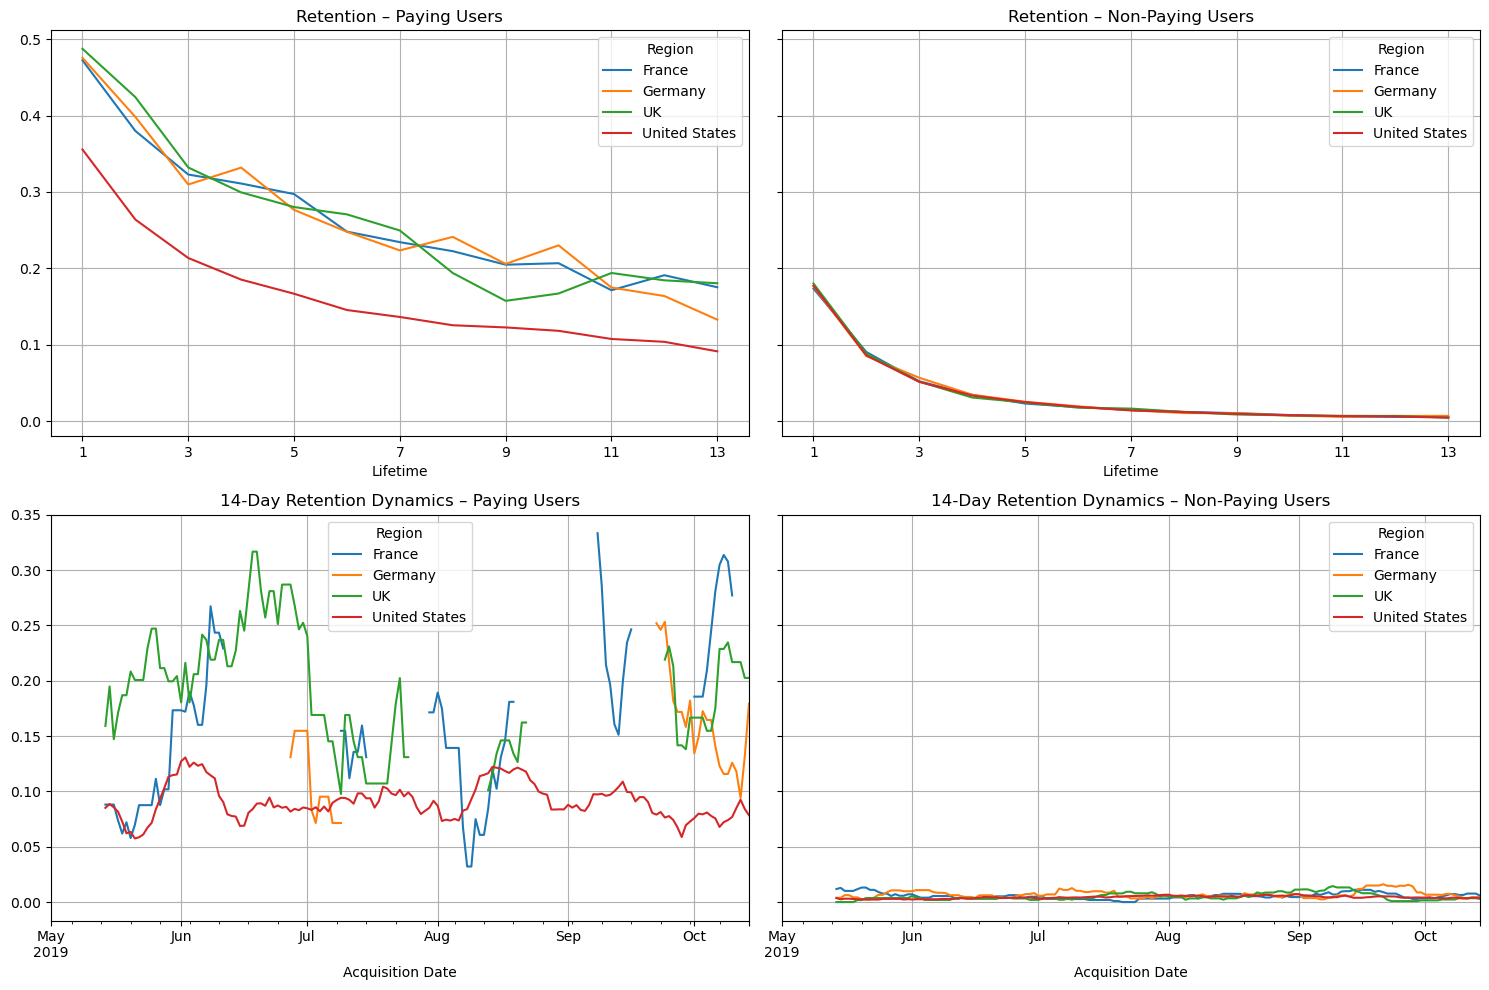

In [96]:
retention_raw, retention_grouped, retention_history = get_retention(
    paid_profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['Region']  
)

plot_retention(
    retention_grouped,
    retention_history,
    horizon=horizon_days,
    window=14  
)

1. **Overall Picture by Region**

Paying users in the UK, France, and Germany consistently demonstrate higher retention compared to the US. At the start, retention in the UK reaches 48–49%, in France and Germany — around 45%, while in the US it is only 36% and declines rapidly.

Non-paying users show similarly low retention across all regions (up to 10%), which is expected.

2. **Day-14 Retention Dynamics**

For paying users in the UK and France, there are retention spikes of up to 25–30%, whereas in the US the graph remains consistently flat — around 10%.

This confirms that US users, on average, are less likely to return to the product even after making an initial purchase. This sharply reduces the cost-effectiveness of user acquisition in that region.





=== Retention charts for organic users ===


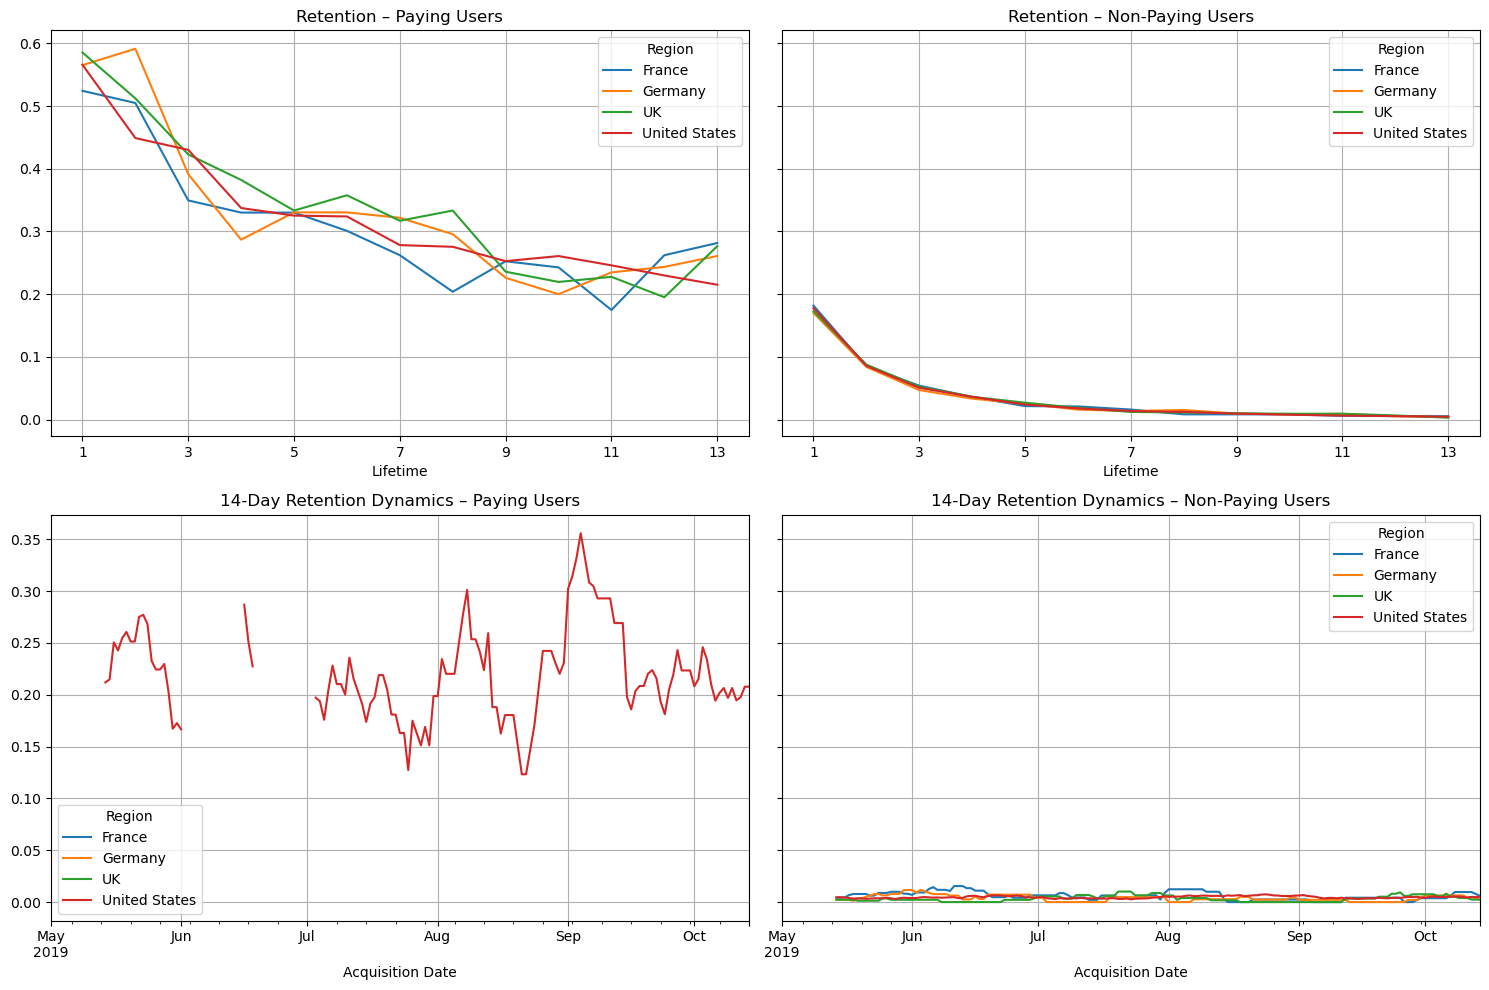

In [98]:
# Let's now look at retention for organic users only
organic_profiles = profiles[profiles['Channel'] == 'organic']

retention_raw, retention_grouped, retention_history = get_retention(
    organic_profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['Region']  
)

print(("\n=== Retention charts for organic users ==="))

plot_retention(
    retention_grouped,
    retention_history,
    horizon=horizon_days,
    window=14  
)

**Organic Retention Insights by Region**

Retention among users who came from organic traffic (about 40% of all users per country) varies significantly by region, especially among paying users.

1. **United States shows stable retention**  
Unlike previous charts where the US often underperformed, here the region demonstrates consistent behavior.  
**Hypothesis:** US users who arrive organically are more motivated and make conscious decisions — this increases loyalty.

2. **Germany and UK start high but drop sharply**  
Both regions show high retention at the beginning, followed by a steep decline.  
**Hypothesis:** Initial motivation may be inflated (e.g., good UX or welcome bonuses), but the product lacks long-term value or proper localization.

3. **France is inconsistent**  
The data shows clear instability in retention curves, possibly due to low traffic volumes or external factors (bugs, updates, etc.).  
**Hypothesis:** Investigate traffic volumes and product changes on the French market.

4. **Non-paying users show uniformly low retention across all regions**  
This confirms the hypothesis that user motivation is weak regardless of geography.  
**Hypothesis:** The current product does not provide enough value for users to return without external incentives. Consider improving onboarding and early engagement mechanics.

**Causal Connection to Previous Results**  
Channel-based retention showed that both payment behavior and retention depend partly on the acquisition source. Now we see that within organic traffic, geography also introduces variance — especially in the case of the US.



**Retention Analysis by Device**



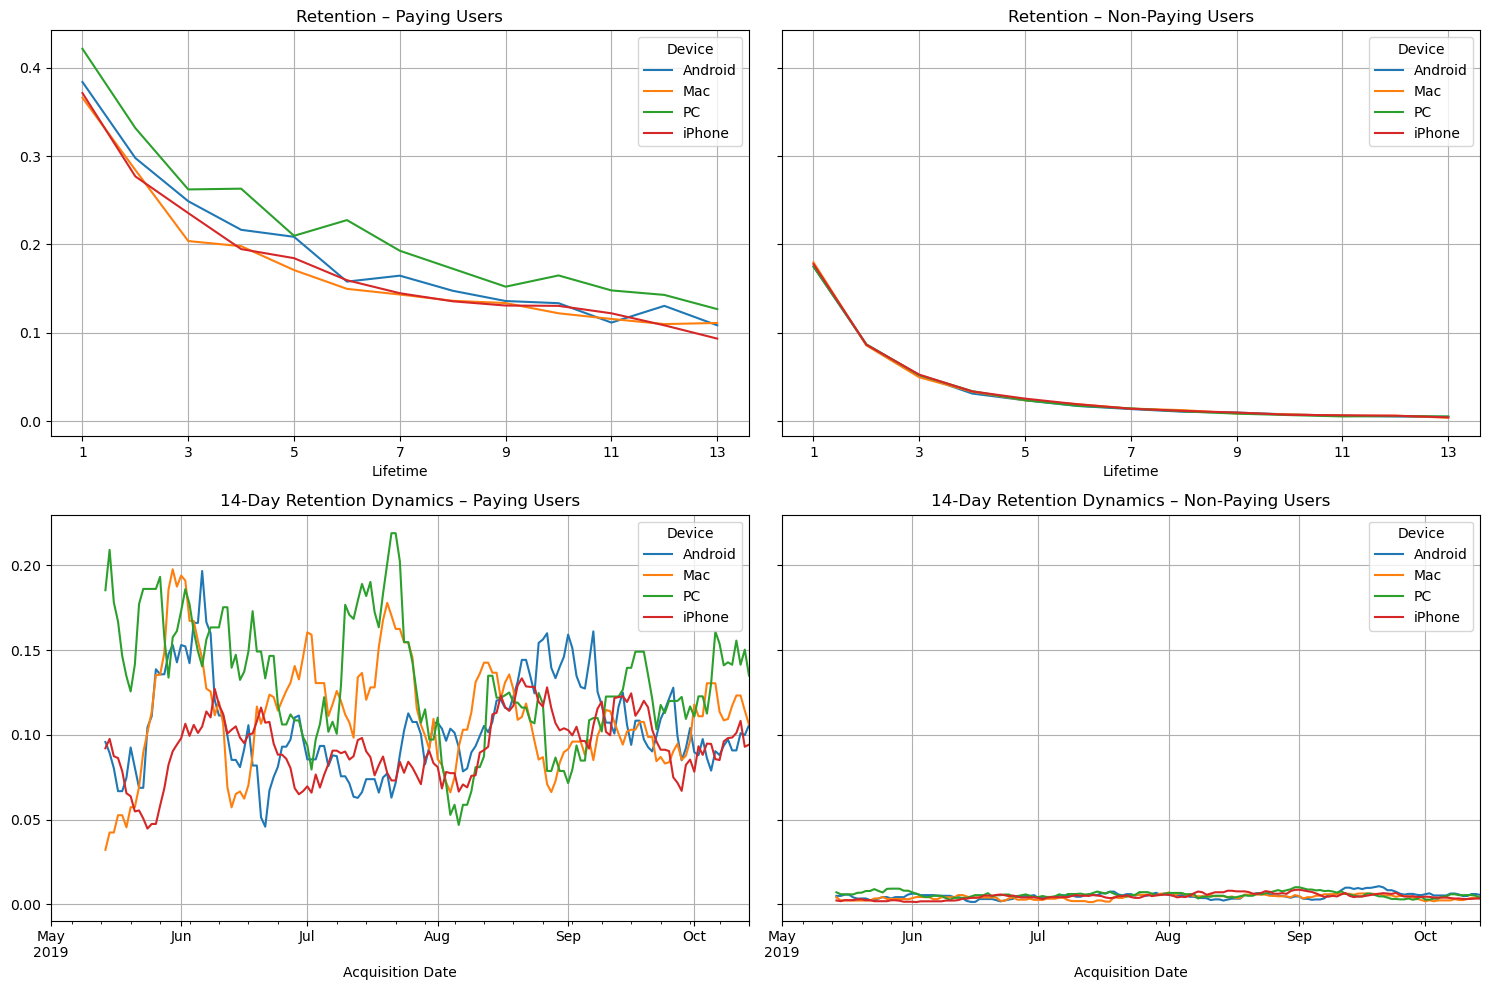

In [101]:
retention_raw, retention_grouped, retention_history = get_retention(
    paid_profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=['Device']  
)

plot_retention(
    retention_grouped,
    retention_history,
    horizon=horizon_days,
    window=14 
)

We also check whether the region influences retention by device — to assess whether the main difference between devices is actually masked by varying traffic geography.


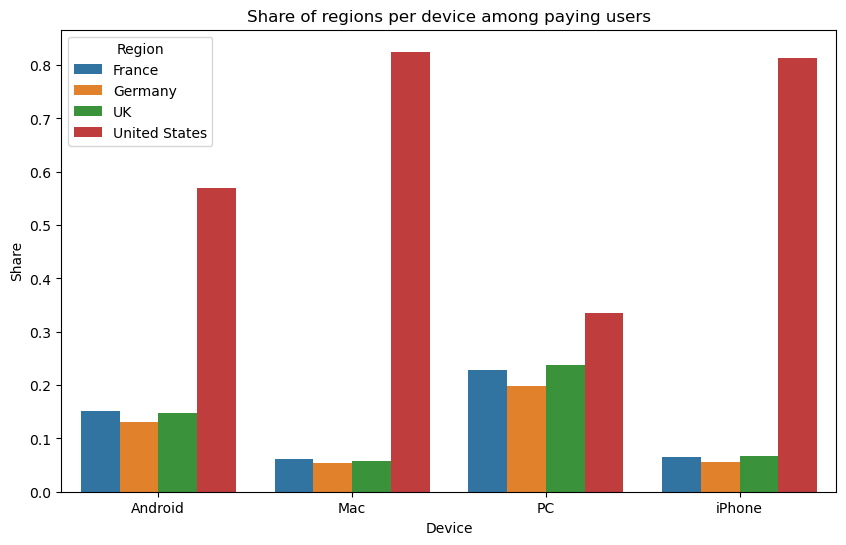

In [103]:
# Count users by region and device
device_region_counts = (
    paid_profiles
    .groupby(['Device', 'Region'])['User Id']
    .nunique()
    .reset_index(name='user_count')
)

# Compute total users per device
device_totals = (
    device_region_counts
    .groupby('Device')['user_count']
    .sum()
    .reset_index(name='total_users')
)

# Merge and calculate region shares within each device
device_region_shares = device_region_counts.merge(device_totals, on='Device')
device_region_shares['share'] = device_region_shares['user_count'] / device_region_shares['total_users']

# Plotting regional distribution by device among paying users
plt.figure(figsize=(10, 6))
sns.barplot(data=device_region_shares, x='Device', y='share', hue='Region')
plt.title('Share of regions per device among paying users')
plt.ylabel('Share')
plt.xlabel('Device')
plt.legend(title='Region')
plt.show()



**Key takeaways**

- **PC** shows the highest retention among paying users, especially in the long run.  
- **Low retention on iPhone and Mac** is likely due not only to the device type, but also to the dominance of **U.S. users** among those device groups.  
- **Regional preferences in device usage** influence overall metrics and should not be interpreted separately from geographic context.


### Conclusions

**Reasons for Ineffective User Acquisition**

1. **Low Conversion from Organic**

- In all countries, the *organic* channel shows the worst conversion rates (below 2.5%).
- At the same time, it dominates in terms of traffic share.

2. **Mismatch Between Costs and Outcomes**

- In the U.S., *TipTop* receives over 60% of the budget, yet underperforms compared to other channels (FaceBoom, AdNonSense).  
- Such imbalances indicate suboptimal budget allocation.

3. **Volatility in Android and PC Performance**

- Android and PC devices show unstable conversion rates, especially in August–September.
- This suggests poor traffic quality or a weak user journey on those platforms.

4. **Unstable Channels**

- Channels like *lambdaMediaAds* show good conversion rates but with sharp fluctuations (especially in August–September), possibly due to short-term promotions or aggressive targeting.

---

**Marketing Department Recommendations**

1. **Segment Paid Channels by Profitability (CAC vs LTV)**

- Analyze Customer Acquisition Cost (CAC) against LTV for each channel.
- Identify effective channel–region–device combinations and reallocate budgets accordingly.

2. **Reevaluate Strategy for the Organic Channel**

- Despite high traffic volume, this channel brings almost no paying users.
- Optimize landing pages, conduct UX testing, or consider adding retargeting.

3. **Focus on High-Conversion Channels**

- Maintain and scale *FaceBoom*, *AdNonSense*, and *lambdaMediaAds*.
- Consider A/B testing creatives and optimizing targeting in these sources.

4. **Investigate User Behavior on Android and PC**

- Conduct user journey and funnel analysis for these devices.
- Identify pain points such as poor UX, bugs, or low engagement.

5. **Account for Seasonality and Campaign Effects**

- June–July shows peaks in many metrics — likely tied to successful promotions.
- Analyze campaign launches and their contribution to metric growth.


**Channel Budget Recommendations**

In the **U.S.**, the majority of the budget (60.2%) is allocated to *TipTop*, which shows high but not outstanding conversion (9.6%). This level of dependence on a single source is risky. Meanwhile, *RocketSuperAds* delivers nearly the same conversion rate (7.9%) with a very low budget share (2%), and *WahooNetBanner* demonstrates stable results (5.09%). It is recommended to maintain TipTop, but test scaling *RocketSuperAds* and *WahooNetBanner*, and reduce spending on *FaceBoom*, which accounts for 35.7% of costs but lacks consistent performance.

In **Germany**, the most effective channels are *lambdaMediaAds* (conversion 10%) and *WahooNetBanner* (5.7%). However, *lambdaMediaAds* is underfunded (10.7% of the budget), while less effective channels like *LeapBob* and *OppleCreativeMedia* receive a significant share of traffic with low conversion (~2.5%). It is recommended to reallocate budget in favor of *lambdaMediaAds* and *WahooNetBanner*, and limit investments in low-performing channels.

In **France**, high conversion rates are observed in *lambdaMediaAds* (11%) and *AdNonSense* (10.98%) with balanced spending. This is the most effective combination for the region, and scaling these channels could improve ROI.

In the **UK**, the situation is similar: *lambdaMediaAds* (10.03%) and *WahooNetBanner* (5.09%) are the most promising sources, delivering high conversion at reasonable costs. These channels should be expanded, especially compared to *LeapBob* and *OppleCreativeMedia*, which consume resources with low returns.

**Summary Recommendations to Reduce CAC and Improve ROI:**

- **U.S.:** Test scaling *RocketSuperAds*, reduce *FaceBoom* and *TipTop*.
- **Germany:** Increase investment in *lambdaMediaAds*, cut *LeapBob* and *OppleCreativeMedia*.
- **France:** Expand budgets for *lambdaMediaAds* and *AdNonSense*.
- **UK:** Focus on *lambdaMediaAds* and *WahooNetBanner*.

Additionally, *lambdaMediaAds* consistently shows strong performance across all countries and is the most promising candidate for scaling in Europe.


**Recommendations for Optimizing TipTop**

1. **Launch Retargeting for High-Retention-Potential Users**

- Set up retargeting campaigns for days 2–5 after the first purchase  
- Offer promotions, bonuses, or personalized incentives  
- Use push notifications or email to re-engage users  

2. **Test New Creatives and Value Propositions**

Current creatives may attract clicks but fail to sustain interest.

- Test creatives that emphasize long-term product value  
- Highlight benefits of repeat usage in the value proposition  
- A/B test landing pages that better explain the product’s usefulness  

3. **Lower Auction Bids**

- If ROI is volatile and CAC increases, consider lowering bids or setting CPM/CPC caps  
- Switch to optimization based on high-quality events (e.g., second purchase) if supported  
- Set a fixed budget and monitor traffic quality changes  

4. **Segment Performance Analysis**

- Segment by device, region, time of day, or age if data is available  
- Identify segments with higher retention or LTV (additional data needed)  
- Focus the budget on high-performing segments and disable underperforming ones  

5. **Embed Post-Purchase Retention Mechanisms**

Many users drop off after a single transaction. Introduce retention hooks immediately after purchase (e.g., gamification, progress bars, loyalty offers):

- Deliver personalized incentives within 24–72 hours after the first purchase  


---

**Recommendations for Optimizing FaceBoom**

1. **Improve Early Retention**

- Add welcome flows, bonuses, and reminders on days 1–5 after acquisition  

2. **Segment FaceBoom Campaigns**

- Identify creatives/audiences with better retention  
- Disable campaigns that underperform  

3. **Align Creative Messaging with Product Experience**

- Ensure advertising accurately reflects the product to avoid user disappointment  

4. **Optimize Budget Allocation**

- Reduce spend on the channel until retention improves  
- Alternatively, test lower bidding strategies  
